In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import time
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix,f1_score, accuracy_score as acc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [7]:
new_data = pd.read_csv("lung.csv")
print(new_data.shape)

(205, 12601)


## 1. Mutual Info[F1] 
## 2. F Classif[F2] 
## 3.T-Test[F3]

## (c) 1. F1( N features ) → F2( 2N/3 features out of selected features from F1) →    
##           F3(N/3 features out of selected features from F2)

# Preprocessing

In [8]:
new_data.head()

,class,38691_s_at,37864_s_at,33273_f_at,33274_f_at,33501_r_at,33500_i_at,33499_s_at,41164_at,38194_s_at,...,41848_f_at,32086_at,33886_at,31781_at,AFFX-BioC-3_at,41422_at,39964_at,36120_at,40571_at,36312_at
0,discrete,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,...,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous
1,class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AD,63.2,4196.25,3306.35,3330.86,1609.47,1597.32,1233.89,255.14,3036.53,...,-17.79,18.63,51.04,-13.74,-29.12,-28.31,20.25,28.35,4.06,-19.41
3,AD,965.47,6207.61,7077.04,6968.59,6569.86,6419.19,6908.34,4785.76,4562.19,...,-5.74,5.94,28.23,-4.68,-13.18,-13.18,21.86,9.12,11.24,8.06
4,AD,2940.51,6858.12,6927.79,6495.99,5273.47,4672.48,5474.67,2140.99,5120.39,...,-17.225,4.725,17.28,-6.59,-17.97,-16.07,10.195,17.285,6.92,-11.09


In [9]:
df = new_data.iloc[2:,:] # Removes first two tubles
print('Required data set ')
df.head()

Required data set 


,class,38691_s_at,37864_s_at,33273_f_at,33274_f_at,33501_r_at,33500_i_at,33499_s_at,41164_at,38194_s_at,...,41848_f_at,32086_at,33886_at,31781_at,AFFX-BioC-3_at,41422_at,39964_at,36120_at,40571_at,36312_at
2,AD,63.2,4196.25,3306.35,3330.86,1609.47,1597.32,1233.89,255.14,3036.53,...,-17.79,18.63,51.04,-13.74,-29.12,-28.31,20.25,28.35,4.06,-19.41
3,AD,965.47,6207.61,7077.04,6968.59,6569.86,6419.19,6908.34,4785.76,4562.19,...,-5.74,5.94,28.23,-4.68,-13.18,-13.18,21.86,9.12,11.24,8.06
4,AD,2940.51,6858.12,6927.79,6495.99,5273.47,4672.48,5474.67,2140.99,5120.39,...,-17.225,4.725,17.28,-6.59,-17.97,-16.07,10.195,17.285,6.92,-11.09
5,AD,64.07,7016.91,7132.05,6983.44,6284.96,5504.68,6097.27,5885.41,5446.04,...,-10.525,11.93,38.755,-5.005,-21.445,-24.335,14.355,39.2,12.335,7.41
6,AD,3451.94,6281.06,6650.54,6858.68,6007.37,5517.95,5729.06,3245.64,5717.88,...,-11.1,-12.11,32.45,-16.17,-13.13,-18.19,11.18,14.22,5.11,-8.06


In [10]:
df.isnull().sum()

class               0
38691_s_at          0
37864_s_at          0
33273_f_at          0
33274_f_at          0
33501_r_at          0
33500_i_at          0
33499_s_at          0
41164_at            0
38194_s_at          0
37004_at            0
40808_at            0
41827_f_at          0
34105_f_at          0
41165_g_at          0
769_s_at            0
33699_at            0
31444_s_at          0
33383_f_at          0
37039_at            0
32052_at            0
32805_at            0
34301_r_at          0
33322_i_at          0
35566_f_at          0
35083_at            0
33377_at            0
34342_s_at          0
32252_at            0
36780_at            0
                   ..
38879_at            0
41334_r_at          0
35681_r_at          0
876_at              0
34938_i_at          0
37524_at            0
AFFX-TrpnX-M_at     0
32037_r_at          0
32301_at            0
32075_at            0
38525_at            0
35894_at            0
35259_s_at          0
34544_at            0
39742_at  

In [11]:
df.iloc[:,0].unique()
df[df.columns[0]] = pd.factorize(df[df.columns[0]])[0]
df.head()

,class,38691_s_at,37864_s_at,33273_f_at,33274_f_at,33501_r_at,33500_i_at,33499_s_at,41164_at,38194_s_at,...,41848_f_at,32086_at,33886_at,31781_at,AFFX-BioC-3_at,41422_at,39964_at,36120_at,40571_at,36312_at
2,0,63.2,4196.25,3306.35,3330.86,1609.47,1597.32,1233.89,255.14,3036.53,...,-17.79,18.63,51.04,-13.74,-29.12,-28.31,20.25,28.35,4.06,-19.41
3,0,965.47,6207.61,7077.04,6968.59,6569.86,6419.19,6908.34,4785.76,4562.19,...,-5.74,5.94,28.23,-4.68,-13.18,-13.18,21.86,9.12,11.24,8.06
4,0,2940.51,6858.12,6927.79,6495.99,5273.47,4672.48,5474.67,2140.99,5120.39,...,-17.225,4.725,17.28,-6.59,-17.97,-16.07,10.195,17.285,6.92,-11.09
5,0,64.07,7016.91,7132.05,6983.44,6284.96,5504.68,6097.27,5885.41,5446.04,...,-10.525,11.93,38.755,-5.005,-21.445,-24.335,14.355,39.2,12.335,7.41
6,0,3451.94,6281.06,6650.54,6858.68,6007.37,5517.95,5729.06,3245.64,5717.88,...,-11.1,-12.11,32.45,-16.17,-13.13,-18.19,11.18,14.22,5.11,-8.06


In [12]:
feature_set = df.iloc[:,1:]
feature_name=list(feature_set)
print('Feature names : '+str(feature_name))

Feature names : ['38691_s_at ', '37864_s_at ', '33273_f_at ', '33274_f_at ', '33501_r_at ', '33500_i_at ', '33499_s_at ', '41164_at ', '38194_s_at ', '37004_at ', '40808_at ', '41827_f_at ', '34105_f_at ', '41165_g_at ', '769_s_at ', '33699_at ', '31444_s_at ', '33383_f_at ', '37039_at ', '32052_at ', '32805_at ', '34301_r_at ', '33322_i_at ', '35566_f_at ', '35083_at ', '33377_at ', '34342_s_at ', '32252_at ', '36780_at ', '31687_f_at ', '37383_f_at ', '39248_at ', '34485_r_at ', 'AFFX ', '35905_s_at ', '676_g_at ', '35530_f_at ', '39026_r_at ', '41237_at ', 'AFFX-HUMGAPDH/M33197_5_at ', '32648_at ', '39016_r_at ', '35016_at ', '613_at ', '38784_g_at ', '36130_f_at ', '38126_at ', '36785_at ', 'AFFX-HUMGAPDH/M33197_3_at ', '38582_at ', '31525_s_at ', '32275_at ', '39220_at ', '31477_at ', '33261_at ', '700_s_at ', '37021_at ', '201_s_at ', '41446_f_at ', '37897_s_at ', '31586_f_at ', '35474_s_at ', '2027_at ', '39594_f_at ', '41745_at ', '31557_at ', '38095_i_at ', '40544_g_at ', '390

In [13]:
feature_set.head()

,38691_s_at,37864_s_at,33273_f_at,33274_f_at,33501_r_at,33500_i_at,33499_s_at,41164_at,38194_s_at,37004_at,...,41848_f_at,32086_at,33886_at,31781_at,AFFX-BioC-3_at,41422_at,39964_at,36120_at,40571_at,36312_at
2,63.2,4196.25,3306.35,3330.86,1609.47,1597.32,1233.89,255.14,3036.53,8.92,...,-17.79,18.63,51.04,-13.74,-29.12,-28.31,20.25,28.35,4.06,-19.41
3,965.47,6207.61,7077.04,6968.59,6569.86,6419.19,6908.34,4785.76,4562.19,1120.1,...,-5.74,5.94,28.23,-4.68,-13.18,-13.18,21.86,9.12,11.24,8.06
4,2940.51,6858.12,6927.79,6495.99,5273.47,4672.48,5474.67,2140.99,5120.39,1212.9,...,-17.225,4.725,17.28,-6.59,-17.97,-16.07,10.195,17.285,6.92,-11.09
5,64.07,7016.91,7132.05,6983.44,6284.96,5504.68,6097.27,5885.41,5446.04,4422.72,...,-10.525,11.93,38.755,-5.005,-21.445,-24.335,14.355,39.2,12.335,7.41
6,3451.94,6281.06,6650.54,6858.68,6007.37,5517.95,5729.06,3245.64,5717.88,4116.73,...,-11.1,-12.11,32.45,-16.17,-13.13,-18.19,11.18,14.22,5.11,-8.06


In [14]:
target_feature = df.iloc[:,0]
target_feature.head()

2    0
3    0
4    0
5    0
6    0
Name: class, dtype: int64

In [15]:
temp_feature_set=StandardScaler().fit_transform(feature_set)
scaled_feature_set = pd.DataFrame(temp_feature_set, columns=feature_name)
scaled_feature_set.head()

,38691_s_at,37864_s_at,33273_f_at,33274_f_at,33501_r_at,33500_i_at,33499_s_at,41164_at,38194_s_at,37004_at,...,41848_f_at,32086_at,33886_at,31781_at,AFFX-BioC-3_at,41422_at,39964_at,36120_at,40571_at,36312_at
0,-0.921957,0.089114,-0.358903,-0.308779,-1.224893,-1.129251,-1.347017,-0.940166,-0.240499,-1.231893,...,0.029278,0.676299,1.202205,-0.259985,-0.322778,-0.446593,0.474743,0.521697,-0.284627,-0.778784
1,-0.566868,0.941621,1.285483,1.300554,0.995647,1.106711,1.323679,1.577288,0.611542,-0.588631,...,0.764167,-0.102548,-0.203140,0.300033,0.667041,0.493047,0.575154,-0.680777,0.170760,0.970673
2,0.210410,1.217338,1.220395,1.091475,0.415313,0.296740,0.648918,0.107713,0.923282,-0.534910,...,0.063735,-0.177118,-0.877780,0.181972,0.369599,0.313565,-0.152354,-0.170210,-0.103233,-0.248916
3,-0.921615,1.284640,1.309472,1.307123,0.868111,0.682642,0.941947,2.188311,1.105149,1.323253,...,0.472345,0.265087,0.445315,0.279944,0.153813,-0.199728,0.107092,1.200160,0.240210,0.929277
4,0.411684,0.972753,1.099487,1.251929,0.743846,0.688795,0.768647,0.721515,1.256965,1.146115,...,0.437278,-1.210363,0.056858,-0.410189,0.670146,0.181904,-0.090923,-0.361868,-0.218031,-0.055947


# Training and Spilting of Data

In [16]:
X_train, X_test, y_train, y_test = train_test_split(scaled_feature_set, target_feature, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape

((162, 12600), (41, 12600))

In [17]:
y_train.shape, y_test.shape

((162,), (41,))

In [18]:
columns = feature_set.shape[1]

number_of_features_required_1 = 2*(columns/3)
number_of_features_required_2 = columns/3
number_of_features_required_3 = 0.19*columns

print('number_of_features_required_1 : '+str(number_of_features_required_1))
print('number_of_features_required_2 : '+str(number_of_features_required_2))
print('number_of_features_required_3 : '+str(number_of_features_required_3))

number_of_features_required_1 = int(number_of_features_required_1)
number_of_features_required_2 = int(number_of_features_required_2)
number_of_features_required_3 = int(number_of_features_required_3)

print('number_of_features_required_1 in integers: '+str(number_of_features_required_1))
print('number_of_features_required_2 in integers: '+str(number_of_features_required_2))
print('number_of_features_required_3 in integers: '+str(number_of_features_required_3))

number_of_features_required_1 : 8400.0
number_of_features_required_2 : 4200.0
number_of_features_required_3 : 2394.0
number_of_features_required_1 in integers: 8400
number_of_features_required_2 in integers: 4200
number_of_features_required_3 in integers: 2394


# Selection of features using Mutual Information 

In [19]:
from scipy.special import digamma
def mutual_info(data,x_index,target):
  x=data[x_index]
  y=target
 
  combo_d= np.vstack((x,y)).T # It is Combining the data values
 
  n=len(x)
  n_x=[]
  unique_y=len(set(y))

  for i in range(unique_y):
    n_x.append([]) 
  for item in combo_d:
    index=int(item[1])
    n_x[index].append(item)
  I_i=np.zeros(len(x))
  indx=0
  for pt in combo_d:
    distx=[]
    
    #Calculating distance of a point with all other points in the same class
    for pt_c in n_x[int(pt[1])]:
      if pt_c[0]==pt[0]:
        continue
      distx.append(abs(pt_c[0]-pt[0]))
    distx.sort()
    
    k=2
    kth_dist_c=distx[k-1]
    dist=[]
    
    #Calculating distance of a point with all other points in the data set
    for pt_all in combo_d:
      if pt_all[0]==pt[0] and pt_all[1]==pt[1]:
        continue
      dist.append(abs(pt_all[0]-pt[0]))
    
    m_i=0
    for i in range(len(dist)):
      if dist[i]<=kth_dist_c:
        m_i+=1
    
    n_x_i=len(n_x[int(pt[1])])
    
    I_i[indx]=digamma(n)-digamma(n_x_i)+digamma(k)-digamma(m_i)
    indx+=1
  mutual_info_xy=np.sum(I_i)/n
  return abs(mutual_info_xy)
  

In [20]:

X_train_tp=[]
temp=X_train.values.transpose()
for arr in temp:
  X_train_tp.append(arr.astype(float))

mi_start_time = time.time()

total_features=len(feature_name)

mutual_information= np.zeros(total_features)
for i in range(total_features):
  mutual_information[i]=mutual_info(X_train_tp,i,y_train)
  print('Mutual Information between Target Class and Feature_'+feature_name[i]+' : ',mutual_information[i])
    
print('Time taken by Mutual Information is :'+str(time.time() - mi_start_time)+' seconds')

Mutual Information between Target Class and Feature_38691_s_at  :  0.2770028345121772
Mutual Information between Target Class and Feature_37864_s_at  :  0.2702596740466957
Mutual Information between Target Class and Feature_33273_f_at  :  0.16475980812715474
Mutual Information between Target Class and Feature_33274_f_at  :  0.14731305675990972
Mutual Information between Target Class and Feature_33501_r_at  :  0.18853954709879897
Mutual Information between Target Class and Feature_33500_i_at  :  0.16918793664099938
Mutual Information between Target Class and Feature_33499_s_at  :  0.2262947319126555
Mutual Information between Target Class and Feature_41164_at  :  0.17702940078281776
Mutual Information between Target Class and Feature_38194_s_at  :  0.30891013492546676
Mutual Information between Target Class and Feature_37004_at  :  0.29306473499967955
Mutual Information between Target Class and Feature_40808_at  :  0.346930115477732
Mutual Information between Target Class and Feature_41

Mutual Information between Target Class and Feature_39775_at  :  0.3865647763400712
Mutual Information between Target Class and Feature_829_s_at  :  0.31039402363488006
Mutual Information between Target Class and Feature_38465_at  :  0.3489374433341461
Mutual Information between Target Class and Feature_37449_i_at  :  0.23528837667684505
Mutual Information between Target Class and Feature_31697_s_at  :  0.19268575972220003
Mutual Information between Target Class and Feature_36617_at  :  0.046707517891054165
Mutual Information between Target Class and Feature_37421_f_at  :  0.1396798742532615
Mutual Information between Target Class and Feature_33702_f_at  :  0.29248825589791777
Mutual Information between Target Class and Feature_273_g_at  :  0.23438313724503065
Mutual Information between Target Class and Feature_31719_at  :  0.33708893961405856
Mutual Information between Target Class and Feature_1612_s_at  :  0.1384465045316535
Mutual Information between Target Class and Feature_31623_f

Mutual Information between Target Class and Feature_36156_at  :  0.25321214763884375
Mutual Information between Target Class and Feature_40887_g_at  :  0.05242616892590823
Mutual Information between Target Class and Feature_32334_f_at  :  0.00894963316084857
Mutual Information between Target Class and Feature_40649_at  :  0.2941317963782679
Mutual Information between Target Class and Feature_34643_at  :  0.05737635746742518
Mutual Information between Target Class and Feature_36938_at  :  0.1674899857077364
Mutual Information between Target Class and Feature_37448_s_at  :  0.2959590222808162
Mutual Information between Target Class and Feature_35194_at  :  0.2916515112098759
Mutual Information between Target Class and Feature_40201_at  :  0.35088591318754486
Mutual Information between Target Class and Feature_911_s_at  :  0.2572606832724995
Mutual Information between Target Class and Feature_2094_s_at  :  0.03249907006684735
Mutual Information between Target Class and Feature_40003_at  :

Mutual Information between Target Class and Feature_917_g_at  :  0.28392810508209193
Mutual Information between Target Class and Feature_38429_at  :  0.1487071814832791
Mutual Information between Target Class and Feature_37473_at  :  0.17189589835858982
Mutual Information between Target Class and Feature_36773_f_at  :  0.3359342055536624
Mutual Information between Target Class and Feature_34235_at  :  0.23458787264122383
Mutual Information between Target Class and Feature_1005_at  :  0.15368171085812515
Mutual Information between Target Class and Feature_36122_at  :  0.05055686704094779
Mutual Information between Target Class and Feature_38751_i_at  :  0.10594270623194427
Mutual Information between Target Class and Feature_40081_at  :  0.2308629539817397
Mutual Information between Target Class and Feature_34842_at  :  0.34612044907173733
Mutual Information between Target Class and Feature_35276_at  :  0.28892466857423194
Mutual Information between Target Class and Feature_36638_at  :  

Mutual Information between Target Class and Feature_37720_at  :  0.09015915147069181
Mutual Information between Target Class and Feature_32563_at  :  0.2601287079051664
Mutual Information between Target Class and Feature_40324_r_at  :  0.09982599840959658
Mutual Information between Target Class and Feature_41753_at  :  0.046300773715290615
Mutual Information between Target Class and Feature_41424_at  :  0.4019422655400203
Mutual Information between Target Class and Feature_36284_at  :  0.06560207178611194
Mutual Information between Target Class and Feature_279_at  :  0.21701417817993465
Mutual Information between Target Class and Feature_36933_at  :  0.14309519298618673
Mutual Information between Target Class and Feature_33998_at  :  0.14058468850203512
Mutual Information between Target Class and Feature_266_s_at  :  0.26922264224368153
Mutual Information between Target Class and Feature_36634_at  :  0.14764553966875207
Mutual Information between Target Class and Feature_31596_f_at  : 

Mutual Information between Target Class and Feature_32321_at  :  0.29397177929681334
Mutual Information between Target Class and Feature_32316_s_at  :  0.08291691545663088
Mutual Information between Target Class and Feature_31546_at  :  0.09134237942406004
Mutual Information between Target Class and Feature_37311_at  :  0.12136376608069932
Mutual Information between Target Class and Feature_40496_at  :  0.28334949943007764
Mutual Information between Target Class and Feature_37061_at  :  0.18095512438574057
Mutual Information between Target Class and Feature_32773_at  :  0.18190177954173556
Mutual Information between Target Class and Feature_37324_at  :  0.2967638130770535
Mutual Information between Target Class and Feature_40898_at  :  0.11778537049822826
Mutual Information between Target Class and Feature_34407_at  :  0.3539594791359244
Mutual Information between Target Class and Feature_36138_at  :  0.13659354593505083
Mutual Information between Target Class and Feature_162_at  :  0.

Mutual Information between Target Class and Feature_33820_g_at  :  0.03365378527264486
Mutual Information between Target Class and Feature_40766_at  :  0.19488843659682756
Mutual Information between Target Class and Feature_38722_at  :  0.08951465773518809
Mutual Information between Target Class and Feature_37168_at  :  0.2779536746737497
Mutual Information between Target Class and Feature_36786_at  :  0.021758825603823168
Mutual Information between Target Class and Feature_35745_f_at  :  0.3058177097044021
Mutual Information between Target Class and Feature_36152_at  :  0.4543752632276872
Mutual Information between Target Class and Feature_2079_s_at  :  0.10118184034511744
Mutual Information between Target Class and Feature_33679_f_at  :  0.04732133807744591
Mutual Information between Target Class and Feature_37403_at  :  0.2831591552604278
Mutual Information between Target Class and Feature_33143_s_at  :  0.3287101168379678
Mutual Information between Target Class and Feature_41629_at

Mutual Information between Target Class and Feature_40541_at  :  0.06963389105366447
Mutual Information between Target Class and Feature_31791_at  :  0.26129071636958495
Mutual Information between Target Class and Feature_38385_at  :  0.11544247665555168
Mutual Information between Target Class and Feature_40635_at  :  0.017783737804263757
Mutual Information between Target Class and Feature_296_at  :  0.04109398779003181
Mutual Information between Target Class and Feature_36986_at  :  0.059368739734198706
Mutual Information between Target Class and Feature_41185_f_at  :  0.1290601144657298
Mutual Information between Target Class and Feature_40125_at  :  0.13484903197779174
Mutual Information between Target Class and Feature_33908_at  :  0.19868358906042557
Mutual Information between Target Class and Feature_41531_at  :  0.2460722142430413
Mutual Information between Target Class and Feature_40825_at  :  0.33277287752539997
Mutual Information between Target Class and Feature_335_r_at  :  

Mutual Information between Target Class and Feature_36608_at  :  0.2735220730096036
Mutual Information between Target Class and Feature_41484_r_at  :  0.1622563860199078
Mutual Information between Target Class and Feature_36452_at  :  0.24766918301364996
Mutual Information between Target Class and Feature_33399_at  :  0.14863511918199182
Mutual Information between Target Class and Feature_33845_at  :  0.04685758738819579
Mutual Information between Target Class and Feature_38121_at  :  0.09876179671636398
Mutual Information between Target Class and Feature_40790_at  :  0.09618567297063615
Mutual Information between Target Class and Feature_503_at  :  0.011268202288039155
Mutual Information between Target Class and Feature_41416_at  :  0.22776504652502175
Mutual Information between Target Class and Feature_1007_s_at  :  0.21318514578107864
Mutual Information between Target Class and Feature_39003_at  :  0.19137224370467898
Mutual Information between Target Class and Feature_41724_at  :  

Mutual Information between Target Class and Feature_34642_at  :  0.12305459022493001
Mutual Information between Target Class and Feature_36614_at  :  0.2175373646515038
Mutual Information between Target Class and Feature_39331_at  :  0.12344192571578722
Mutual Information between Target Class and Feature_37065_f_at  :  0.05199840054925058
Mutual Information between Target Class and Feature_38647_at  :  0.07211098957991505
Mutual Information between Target Class and Feature_32192_g_at  :  0.2677448837410515
Mutual Information between Target Class and Feature_32140_at  :  0.13316218239930327
Mutual Information between Target Class and Feature_40828_at  :  0.213847704947604
Mutual Information between Target Class and Feature_924_s_at  :  0.23437836559265435
Mutual Information between Target Class and Feature_35363_at  :  0.23628381809878923
Mutual Information between Target Class and Feature_39561_at  :  0.391356726804493
Mutual Information between Target Class and Feature_35852_at  :  0.

Mutual Information between Target Class and Feature_32530_at  :  0.35532668864504363
Mutual Information between Target Class and Feature_1549_s_at  :  0.1661929561182415
Mutual Information between Target Class and Feature_38527_at  :  0.1959127268212377
Mutual Information between Target Class and Feature_35270_at  :  0.260976722288308
Mutual Information between Target Class and Feature_39088_at  :  0.04111613032479959
Mutual Information between Target Class and Feature_38484_at  :  0.41950252372422125
Mutual Information between Target Class and Feature_40867_at  :  0.2541853374073001
Mutual Information between Target Class and Feature_34796_at  :  0.2972182002697078
Mutual Information between Target Class and Feature_34278_at  :  0.06623638543005106
Mutual Information between Target Class and Feature_31745_at  :  0.14502429909762776
Mutual Information between Target Class and Feature_32080_at  :  0.002955895557998056
Mutual Information between Target Class and Feature_306_s_at  :  0.05

Mutual Information between Target Class and Feature_41814_at  :  0.055826662176780215
Mutual Information between Target Class and Feature_36975_at  :  0.24000641046787868
Mutual Information between Target Class and Feature_1788_s_at  :  0.2182739632295365
Mutual Information between Target Class and Feature_32893_s_at  :  0.30424062052074585
Mutual Information between Target Class and Feature_38681_at  :  0.0346748889039358
Mutual Information between Target Class and Feature_38858_at  :  0.10045251574367185
Mutual Information between Target Class and Feature_37189_at  :  0.1585095334443056
Mutual Information between Target Class and Feature_40163_r_at  :  0.03653407038729977
Mutual Information between Target Class and Feature_35378_at  :  0.07255400345729378
Mutual Information between Target Class and Feature_39856_at  :  0.05513822361864014
Mutual Information between Target Class and Feature_34819_at  :  0.2930433065939217
Mutual Information between Target Class and Feature_697_f_at  :

Mutual Information between Target Class and Feature_38773_at  :  0.16653631123071247
Mutual Information between Target Class and Feature_32313_at  :  0.024319611527015138
Mutual Information between Target Class and Feature_32752_at  :  0.35567459708522586
Mutual Information between Target Class and Feature_41504_s_at  :  0.3161592887483922
Mutual Information between Target Class and Feature_1399_at  :  0.11320709678909895
Mutual Information between Target Class and Feature_977_s_at  :  0.049436314862663755
Mutual Information between Target Class and Feature_34678_at  :  0.3027539769383971
Mutual Information between Target Class and Feature_33919_at  :  0.1633664089073713
Mutual Information between Target Class and Feature_39436_at  :  0.15081425321697825
Mutual Information between Target Class and Feature_189_s_at  :  0.1769236970986372
Mutual Information between Target Class and Feature_1519_at  :  0.08299824538453474
Mutual Information between Target Class and Feature_38480_s_at  :  

Mutual Information between Target Class and Feature_1252_at  :  0.42716425300064803
Mutual Information between Target Class and Feature_632_at  :  0.1364968242146059
Mutual Information between Target Class and Feature_37346_at  :  0.16331836170887207
Mutual Information between Target Class and Feature_32392_s_at  :  0.06919839330593604
Mutual Information between Target Class and Feature_39382_at  :  0.12098047093826067
Mutual Information between Target Class and Feature_40622_r_at  :  0.02423771537559567
Mutual Information between Target Class and Feature_37268_at  :  0.35019515544278146
Mutual Information between Target Class and Feature_37675_at  :  0.113361290252637
Mutual Information between Target Class and Feature_40954_at  :  0.2652040966703589
Mutual Information between Target Class and Feature_34397_at  :  0.24261690517159934
Mutual Information between Target Class and Feature_38063_at  :  0.26227334839460364
Mutual Information between Target Class and Feature_607_s_at  :  0.3

Mutual Information between Target Class and Feature_37747_at  :  0.1510761634775021
Mutual Information between Target Class and Feature_36949_at  :  0.3157894117721317
Mutual Information between Target Class and Feature_40115_at  :  0.08026854791793081
Mutual Information between Target Class and Feature_39708_at  :  0.12875592823181597
Mutual Information between Target Class and Feature_408_at  :  0.11705527966400865
Mutual Information between Target Class and Feature_33371_s_at  :  0.30756382451727055
Mutual Information between Target Class and Feature_130_s_at  :  0.2598790048135427
Mutual Information between Target Class and Feature_36147_at  :  0.04547548329723445
Mutual Information between Target Class and Feature_31512_at  :  0.08613514699669332
Mutual Information between Target Class and Feature_35506_s_at  :  0.056039505863952975
Mutual Information between Target Class and Feature_35219_at  :  0.005802623059737486
Mutual Information between Target Class and Feature_1411_at  :  

Mutual Information between Target Class and Feature_954_s_at  :  0.03697767076072511
Mutual Information between Target Class and Feature_37323_r_at  :  0.030340376337355132
Mutual Information between Target Class and Feature_39128_r_at  :  0.18283110050277268
Mutual Information between Target Class and Feature_35307_at  :  0.029511503724971428
Mutual Information between Target Class and Feature_35808_at  :  0.1472680819762452
Mutual Information between Target Class and Feature_33727_r_at  :  0.059814319018022824
Mutual Information between Target Class and Feature_181_g_at  :  0.023023450274275273
Mutual Information between Target Class and Feature_38017_at  :  0.10942850718200516
Mutual Information between Target Class and Feature_34771_at  :  0.17324309982899824
Mutual Information between Target Class and Feature_1827_s_at  :  0.037788554732399594
Mutual Information between Target Class and Feature_37014_at  :  0.08788005684685195
Mutual Information between Target Class and Feature_34

Mutual Information between Target Class and Feature_35630_at  :  0.2178735346544999
Mutual Information between Target Class and Feature_35297_at  :  0.13907571618873768
Mutual Information between Target Class and Feature_36503_at  :  0.1983844210239137
Mutual Information between Target Class and Feature_41292_at  :  0.017314916668740066
Mutual Information between Target Class and Feature_37082_at  :  0.17815893862280893
Mutual Information between Target Class and Feature_1984_s_at  :  0.23669321416733802
Mutual Information between Target Class and Feature_31891_at  :  0.08006363547504379
Mutual Information between Target Class and Feature_38738_at  :  0.18123832853228528
Mutual Information between Target Class and Feature_38649_at  :  0.23708208255751909
Mutual Information between Target Class and Feature_32591_at  :  0.3666864837569989
Mutual Information between Target Class and Feature_121_at  :  0.007934996577636796
Mutual Information between Target Class and Feature_40415_at  :  0.

Mutual Information between Target Class and Feature_33452_at  :  0.10229595363709466
Mutual Information between Target Class and Feature_37530_s_at  :  0.2568909994775555
Mutual Information between Target Class and Feature_39178_at  :  0.23564215386989165
Mutual Information between Target Class and Feature_39358_at  :  0.02439282459209835
Mutual Information between Target Class and Feature_37678_at  :  0.1913159639704584
Mutual Information between Target Class and Feature_32081_at  :  0.0878229464316685
Mutual Information between Target Class and Feature_33758_f_at  :  0.016331728073517904
Mutual Information between Target Class and Feature_40445_at  :  0.13960545957839757
Mutual Information between Target Class and Feature_39876_at  :  0.1390442113702888
Mutual Information between Target Class and Feature_32787_at  :  0.1942150074367966
Mutual Information between Target Class and Feature_31893_at  :  0.02635089755015651
Mutual Information between Target Class and Feature_32408_s_at  :

Mutual Information between Target Class and Feature_36543_at  :  0.13858075433340838
Mutual Information between Target Class and Feature_36482_s_at  :  0.1098719011748369
Mutual Information between Target Class and Feature_1122_f_at  :  0.00030789632061424527
Mutual Information between Target Class and Feature_41140_at  :  0.1355249001072151
Mutual Information between Target Class and Feature_32993_s_at  :  0.002526981948616891
Mutual Information between Target Class and Feature_35555_r_at  :  0.15334338120656998
Mutual Information between Target Class and Feature_37666_at  :  0.13156511019334682
Mutual Information between Target Class and Feature_2093_s_at  :  0.24437941942711144
Mutual Information between Target Class and Feature_39685_at  :  0.23821752637062027
Mutual Information between Target Class and Feature_35341_at  :  0.06552537395365012
Mutual Information between Target Class and Feature_37366_at  :  0.029933862703251286
Mutual Information between Target Class and Feature_39

Mutual Information between Target Class and Feature_1602_at  :  0.11523846656551348
Mutual Information between Target Class and Feature_40817_at  :  0.11148623936837779
Mutual Information between Target Class and Feature_34828_at  :  0.21589180150837275
Mutual Information between Target Class and Feature_32464_at  :  0.04642201934021921
Mutual Information between Target Class and Feature_41047_at  :  0.051477420848149553
Mutual Information between Target Class and Feature_37417_at  :  0.018258895229755
Mutual Information between Target Class and Feature_34814_at  :  0.14089815999232846
Mutual Information between Target Class and Feature_33901_at  :  0.046438945709539194
Mutual Information between Target Class and Feature_34933_at  :  0.009048948742950837
Mutual Information between Target Class and Feature_36635_at  :  0.1078840255240121
Mutual Information between Target Class and Feature_31693_f_at  :  0.1568761427790313
Mutual Information between Target Class and Feature_33080_s_at  :

Mutual Information between Target Class and Feature_36210_g_at  :  0.2013910382042962
Mutual Information between Target Class and Feature_38832_r_at  :  0.06410554596479943
Mutual Information between Target Class and Feature_38085_at  :  0.19132552447602102
Mutual Information between Target Class and Feature_41413_at  :  0.13541686153613294
Mutual Information between Target Class and Feature_197_at  :  0.3146004598665785
Mutual Information between Target Class and Feature_40409_at  :  0.09565763863301802
Mutual Information between Target Class and Feature_37463_r_at  :  0.005015021418217301
Mutual Information between Target Class and Feature_36970_at  :  0.36837832059606707
Mutual Information between Target Class and Feature_35350_at  :  0.09787353603874009
Mutual Information between Target Class and Feature_31637_s_at  :  0.21785037230422272
Mutual Information between Target Class and Feature_37347_at  :  0.24687500690351386
Mutual Information between Target Class and Feature_36985_at

Mutual Information between Target Class and Feature_37742_at  :  0.2201302213785928
Mutual Information between Target Class and Feature_36600_at  :  0.031175732294778408
Mutual Information between Target Class and Feature_36581_at  :  0.19750013376208977
Mutual Information between Target Class and Feature_39995_s_at  :  0.21244397690472192
Mutual Information between Target Class and Feature_40421_at  :  0.3690722635026439
Mutual Information between Target Class and Feature_36977_at  :  0.2855048353784543
Mutual Information between Target Class and Feature_37320_at  :  0.06254001358657635
Mutual Information between Target Class and Feature_37921_at  :  0.1342316865415222
Mutual Information between Target Class and Feature_658_at  :  0.15004706387523015
Mutual Information between Target Class and Feature_2089_s_at  :  0.14535066353184603
Mutual Information between Target Class and Feature_37408_at  :  0.12301978856404965
Mutual Information between Target Class and Feature_31826_at  :  0.

Mutual Information between Target Class and Feature_33802_at  :  0.06951490355386591
Mutual Information between Target Class and Feature_1347_at  :  0.026090799020907853
Mutual Information between Target Class and Feature_40636_at  :  0.12529057089258078
Mutual Information between Target Class and Feature_1000_at  :  0.05717545166381949
Mutual Information between Target Class and Feature_32190_at  :  0.03670930136666891
Mutual Information between Target Class and Feature_34623_at  :  0.0881994365420872
Mutual Information between Target Class and Feature_37740_r_at  :  0.17232569883094934
Mutual Information between Target Class and Feature_32814_at  :  0.020146579032783073
Mutual Information between Target Class and Feature_1681_at  :  0.07446975562867389
Mutual Information between Target Class and Feature_41400_at  :  0.07831244212530913
Mutual Information between Target Class and Feature_38003_s_at  :  0.17930520385923937
Mutual Information between Target Class and Feature_33295_at  :

Mutual Information between Target Class and Feature_32728_at  :  0.2546459766748557
Mutual Information between Target Class and Feature_38881_i_at  :  0.04214902148624488
Mutual Information between Target Class and Feature_1497_at  :  0.05806475247043101
Mutual Information between Target Class and Feature_2056_at  :  0.14695296507536684
Mutual Information between Target Class and Feature_41450_at  :  0.07659299004375433
Mutual Information between Target Class and Feature_40866_at  :  0.2534061813801409
Mutual Information between Target Class and Feature_40107_at  :  0.1464630244616611
Mutual Information between Target Class and Feature_988_at  :  0.17049096692958146
Mutual Information between Target Class and Feature_35917_at  :  0.1669690393331501
Mutual Information between Target Class and Feature_40712_at  :  0.18419066665807085
Mutual Information between Target Class and Feature_34231_at  :  0.20940773636809099
Mutual Information between Target Class and Feature_33319_at  :  0.0062

Mutual Information between Target Class and Feature_39634_at  :  0.21571136504397775
Mutual Information between Target Class and Feature_1225_g_at  :  0.14510163513102223
Mutual Information between Target Class and Feature_39255_at  :  0.19849726231735054
Mutual Information between Target Class and Feature_1565_s_at  :  0.002809029871109371
Mutual Information between Target Class and Feature_999_at  :  0.18041676958635477
Mutual Information between Target Class and Feature_39825_at  :  0.02754721969404687
Mutual Information between Target Class and Feature_33016_at  :  0.031073648594175215
Mutual Information between Target Class and Feature_41306_at  :  0.23574851830569218
Mutual Information between Target Class and Feature_34067_at  :  0.18640327854657776
Mutual Information between Target Class and Feature_31502_at  :  0.17027047006219473
Mutual Information between Target Class and Feature_33505_at  :  0.02010841461874155
Mutual Information between Target Class and Feature_40848_g_at 

Mutual Information between Target Class and Feature_32251_at  :  0.21039581106497443
Mutual Information between Target Class and Feature_1895_at  :  0.04213373795549251
Mutual Information between Target Class and Feature_34677_f_at  :  0.02454479630900502
Mutual Information between Target Class and Feature_37148_at  :  0.3040530512400901
Mutual Information between Target Class and Feature_38230_at  :  0.12986052681177546
Mutual Information between Target Class and Feature_33468_at  :  0.183129261377268
Mutual Information between Target Class and Feature_33878_at  :  0.10088463014645473
Mutual Information between Target Class and Feature_40225_at  :  0.14874055712601836
Mutual Information between Target Class and Feature_34598_at  :  0.06603766770623173
Mutual Information between Target Class and Feature_35840_at  :  0.1941668179900869
Mutual Information between Target Class and Feature_35402_at  :  0.2268239134873854
Mutual Information between Target Class and Feature_41351_at  :  0.04

Mutual Information between Target Class and Feature_35264_at  :  0.44058074053984686
Mutual Information between Target Class and Feature_38675_at  :  0.042211887452258776
Mutual Information between Target Class and Feature_37016_at  :  0.0003018926586913845
Mutual Information between Target Class and Feature_38401_s_at  :  0.06519618083065201
Mutual Information between Target Class and Feature_1822_at  :  0.13557457565408007
Mutual Information between Target Class and Feature_34740_at  :  0.14609320248876048
Mutual Information between Target Class and Feature_39103_s_at  :  0.1396601427102496
Mutual Information between Target Class and Feature_32980_f_at  :  0.16716429475278116
Mutual Information between Target Class and Feature_38342_at  :  0.1266832849858403
Mutual Information between Target Class and Feature_40414_at  :  0.06725579395859152
Mutual Information between Target Class and Feature_36703_at  :  0.12428314728047332
Mutual Information between Target Class and Feature_33255_a

Mutual Information between Target Class and Feature_31670_s_at  :  0.02772407175674736
Mutual Information between Target Class and Feature_41132_r_at  :  0.08261246377184664
Mutual Information between Target Class and Feature_34503_at  :  0.008065720812683903
Mutual Information between Target Class and Feature_31497_at  :  0.1138359590459813
Mutual Information between Target Class and Feature_754_s_at  :  0.0370454066175494
Mutual Information between Target Class and Feature_39445_at  :  0.15497956630491688
Mutual Information between Target Class and Feature_37744_r_at  :  0.12838017151057543
Mutual Information between Target Class and Feature_34832_s_at  :  0.18717902725335703
Mutual Information between Target Class and Feature_32783_at  :  0.05061086783067623
Mutual Information between Target Class and Feature_41407_at  :  0.07642998353404028
Mutual Information between Target Class and Feature_40182_s_at  :  0.019629782347089505
Mutual Information between Target Class and Feature_171

Mutual Information between Target Class and Feature_40108_at  :  0.010437043566422263
Mutual Information between Target Class and Feature_1470_at  :  0.08034655180080236
Mutual Information between Target Class and Feature_41283_at  :  0.23000642901174706
Mutual Information between Target Class and Feature_35671_at  :  0.23493951053003193
Mutual Information between Target Class and Feature_36728_at  :  0.11493360750187398
Mutual Information between Target Class and Feature_37749_at  :  0.1671412599408122
Mutual Information between Target Class and Feature_32846_s_at  :  0.180755086794896
Mutual Information between Target Class and Feature_41074_at  :  0.0319564758058497
Mutual Information between Target Class and Feature_40129_at  :  0.15931959605788484
Mutual Information between Target Class and Feature_31636_s_at  :  0.01549190993048694
Mutual Information between Target Class and Feature_34769_at  :  0.19961817060211245
Mutual Information between Target Class and Feature_41197_at  :  

Mutual Information between Target Class and Feature_38613_at  :  0.19955704720833933
Mutual Information between Target Class and Feature_325_s_at  :  0.042494735748433814
Mutual Information between Target Class and Feature_37823_at  :  0.014452226407647784
Mutual Information between Target Class and Feature_33666_at  :  0.006255201945236104
Mutual Information between Target Class and Feature_39917_at  :  0.16782337104663575
Mutual Information between Target Class and Feature_35985_at  :  0.2013519805965006
Mutual Information between Target Class and Feature_41737_at  :  0.10698429242542774
Mutual Information between Target Class and Feature_1897_at  :  0.19336221636901782
Mutual Information between Target Class and Feature_40275_at  :  0.4377521845068107
Mutual Information between Target Class and Feature_37020_at  :  0.09306697406093095
Mutual Information between Target Class and Feature_1609_g_at  :  0.09150309658935207
Mutual Information between Target Class and Feature_1438_at  :  

Mutual Information between Target Class and Feature_33470_at  :  0.14199898033022393
Mutual Information between Target Class and Feature_34042_at  :  0.047010274535303695
Mutual Information between Target Class and Feature_38208_at  :  0.07444842094911541
Mutual Information between Target Class and Feature_34182_at  :  0.17119999060700414
Mutual Information between Target Class and Feature_36892_at  :  0.11942970495844933
Mutual Information between Target Class and Feature_38012_at  :  0.09324148081265693
Mutual Information between Target Class and Feature_1944_f_at  :  0.011948636907531484
Mutual Information between Target Class and Feature_40109_at  :  0.0694860634931817
Mutual Information between Target Class and Feature_36683_at  :  0.12275899405636449
Mutual Information between Target Class and Feature_36187_at  :  0.10920609011000162
Mutual Information between Target Class and Feature_37389_at  :  0.19109812839657742
Mutual Information between Target Class and Feature_1100_at  : 

Mutual Information between Target Class and Feature_38984_at  :  0.28508053158281693
Mutual Information between Target Class and Feature_40427_at  :  0.26180503245269493
Mutual Information between Target Class and Feature_40780_at  :  0.004836997493288579
Mutual Information between Target Class and Feature_37316_r_at  :  0.1214092829527897
Mutual Information between Target Class and Feature_37982_at  :  0.20072646415365913
Mutual Information between Target Class and Feature_40650_r_at  :  0.05868146554396172
Mutual Information between Target Class and Feature_32198_at  :  0.12733352564549194
Mutual Information between Target Class and Feature_170_at  :  0.04094285000088735
Mutual Information between Target Class and Feature_37913_at  :  0.04075387639601886
Mutual Information between Target Class and Feature_33993_at  :  0.027321896534316496
Mutual Information between Target Class and Feature_40485_at  :  0.18113914830719302
Mutual Information between Target Class and Feature_32101_at  

Mutual Information between Target Class and Feature_1640_at  :  0.2003681742825857
Mutual Information between Target Class and Feature_32508_at  :  0.08213323759616668
Mutual Information between Target Class and Feature_41550_at  :  0.10773883529371922
Mutual Information between Target Class and Feature_33967_at  :  0.09904367434726705
Mutual Information between Target Class and Feature_34154_at  :  0.04757401518821669
Mutual Information between Target Class and Feature_35443_at  :  0.0765870160876645
Mutual Information between Target Class and Feature_31620_at  :  0.07287882824875454
Mutual Information between Target Class and Feature_31740_s_at  :  0.14883927458178073
Mutual Information between Target Class and Feature_37242_at  :  0.19955957061184026
Mutual Information between Target Class and Feature_33329_at  :  0.282313300731509
Mutual Information between Target Class and Feature_39471_at  :  0.15462367461438883
Mutual Information between Target Class and Feature_31608_g_at  :  0

Mutual Information between Target Class and Feature_41597_s_at  :  0.12901282298922817
Mutual Information between Target Class and Feature_36847_r_at  :  0.11874499321612075
Mutual Information between Target Class and Feature_1015_s_at  :  0.06617780945303002
Mutual Information between Target Class and Feature_38251_at  :  0.2917374955875949
Mutual Information between Target Class and Feature_35071_s_at  :  0.1578791593638274
Mutual Information between Target Class and Feature_1517_at  :  0.049607682338634385
Mutual Information between Target Class and Feature_38033_at  :  0.16557709413484692
Mutual Information between Target Class and Feature_1210_s_at  :  0.10413362080344894
Mutual Information between Target Class and Feature_1887_g_at  :  0.0872895275223324
Mutual Information between Target Class and Feature_35311_at  :  0.1692301087511664
Mutual Information between Target Class and Feature_41124_r_at  :  0.18008595268903485
Mutual Information between Target Class and Feature_35221_

Mutual Information between Target Class and Feature_1875_f_at  :  0.11537342903793757
Mutual Information between Target Class and Feature_37684_at  :  0.23872286846120203
Mutual Information between Target Class and Feature_39949_at  :  0.07215777440796908
Mutual Information between Target Class and Feature_293_at  :  0.004867363990967159
Mutual Information between Target Class and Feature_AFFX-HUMTFRR/M11507_3_at  :  0.04279281150711492
Mutual Information between Target Class and Feature_37141_at  :  0.23518228286953427
Mutual Information between Target Class and Feature_34965_at  :  0.06096356875734725
Mutual Information between Target Class and Feature_388_at  :  0.16416756184518552
Mutual Information between Target Class and Feature_32625_at  :  0.11608320645369137
Mutual Information between Target Class and Feature_39068_at  :  0.03187284720844608
Mutual Information between Target Class and Feature_32971_at  :  0.15757523595669115
Mutual Information between Target Class and Feature

Mutual Information between Target Class and Feature_40175_at  :  0.33669103702694675
Mutual Information between Target Class and Feature_35361_at  :  0.21043800605705493
Mutual Information between Target Class and Feature_39925_at  :  0.016630331514216938
Mutual Information between Target Class and Feature_33033_at  :  0.21735442065966948
Mutual Information between Target Class and Feature_36422_s_at  :  0.03452945842397398
Mutual Information between Target Class and Feature_35360_at  :  0.05563392230225175
Mutual Information between Target Class and Feature_41858_at  :  0.021204399199920267
Mutual Information between Target Class and Feature_41354_at  :  0.025726964402594102
Mutual Information between Target Class and Feature_33594_at  :  0.09617710838915114
Mutual Information between Target Class and Feature_37286_at  :  0.2832799607099043
Mutual Information between Target Class and Feature_41717_at  :  0.08542266544557395
Mutual Information between Target Class and Feature_1483_at  

Mutual Information between Target Class and Feature_40112_at  :  0.16186012421438303
Mutual Information between Target Class and Feature_36116_at  :  0.2294513450179314
Mutual Information between Target Class and Feature_34866_at  :  0.051796433569207774
Mutual Information between Target Class and Feature_37838_at  :  0.024106387100355692
Mutual Information between Target Class and Feature_35755_at  :  0.1253078177984504
Mutual Information between Target Class and Feature_38220_at  :  0.12903756233738384
Mutual Information between Target Class and Feature_41715_at  :  0.09465200051841013
Mutual Information between Target Class and Feature_40539_at  :  0.18181712292573057
Mutual Information between Target Class and Feature_34438_at  :  0.04784380898626793
Mutual Information between Target Class and Feature_1970_s_at  :  0.03499702001649877
Mutual Information between Target Class and Feature_1386_at  :  0.1566621799203341
Mutual Information between Target Class and Feature_39633_at  :  0

Mutual Information between Target Class and Feature_190_at  :  0.11497486668232505
Mutual Information between Target Class and Feature_37833_at  :  0.15151897769661413
Mutual Information between Target Class and Feature_36841_at  :  0.11436643601739206
Mutual Information between Target Class and Feature_38069_at  :  0.10140675576454021
Mutual Information between Target Class and Feature_38286_at  :  0.16885347809731568
Mutual Information between Target Class and Feature_40038_at  :  0.13114077287246165
Mutual Information between Target Class and Feature_1919_at  :  0.1501602375250038
Mutual Information between Target Class and Feature_41034_s_at  :  0.06182885021681728
Mutual Information between Target Class and Feature_31701_r_at  :  0.042443429656818334
Mutual Information between Target Class and Feature_36173_r_at  :  0.023239700489418005
Mutual Information between Target Class and Feature_34800_at  :  0.061131314799946906
Mutual Information between Target Class and Feature_37928_at

Mutual Information between Target Class and Feature_39451_i_at  :  0.024425566258930557
Mutual Information between Target Class and Feature_34246_at  :  0.09735471180429056
Mutual Information between Target Class and Feature_40082_at  :  0.0652013858279566
Mutual Information between Target Class and Feature_36899_at  :  0.17884934018676452
Mutual Information between Target Class and Feature_40659_at  :  0.0019934774960595008
Mutual Information between Target Class and Feature_41657_at  :  0.09050222921673994
Mutual Information between Target Class and Feature_40581_at  :  0.08190383239219351
Mutual Information between Target Class and Feature_37977_at  :  0.14840375470759645
Mutual Information between Target Class and Feature_36852_at  :  0.18855195513045042
Mutual Information between Target Class and Feature_34670_at  :  0.0592509183352802
Mutual Information between Target Class and Feature_41318_g_at  :  0.17211219545319606
Mutual Information between Target Class and Feature_36218_g_

Mutual Information between Target Class and Feature_37839_at  :  0.12027954769439546
Mutual Information between Target Class and Feature_35666_at  :  0.11884593465340497
Mutual Information between Target Class and Feature_39837_s_at  :  0.14461648686969178
Mutual Information between Target Class and Feature_39047_at  :  0.19178618518045204
Mutual Information between Target Class and Feature_33785_at  :  0.09245299189954259
Mutual Information between Target Class and Feature_1785_at  :  0.1415440742708449
Mutual Information between Target Class and Feature_41107_at  :  0.40876472443344475
Mutual Information between Target Class and Feature_31773_at  :  0.05983821798241948
Mutual Information between Target Class and Feature_32176_at  :  0.1416349732039013
Mutual Information between Target Class and Feature_799_at  :  0.19673625139530035
Mutual Information between Target Class and Feature_33609_at  :  0.12641526159866004
Mutual Information between Target Class and Feature_38824_at  :  0.0

Mutual Information between Target Class and Feature_40994_at  :  0.24085284273653804
Mutual Information between Target Class and Feature_40253_at  :  0.18672393153319733
Mutual Information between Target Class and Feature_31499_s_at  :  0.04804854097812592
Mutual Information between Target Class and Feature_37640_at  :  0.21506728423508217
Mutual Information between Target Class and Feature_35621_at  :  0.12334554966713548
Mutual Information between Target Class and Feature_36489_at  :  0.21419257850210033
Mutual Information between Target Class and Feature_35198_at  :  0.024789167574681564
Mutual Information between Target Class and Feature_869_at  :  0.16093384751556247
Mutual Information between Target Class and Feature_38106_at  :  0.0011690752654982567
Mutual Information between Target Class and Feature_37780_at  :  0.37389680924329305
Mutual Information between Target Class and Feature_36915_at  :  0.2513732521292287
Mutual Information between Target Class and Feature_36833_at  :

Mutual Information between Target Class and Feature_36691_at  :  0.040284445629888616
Mutual Information between Target Class and Feature_36135_at  :  0.09372189854329625
Mutual Information between Target Class and Feature_41443_at  :  0.12823580354024133
Mutual Information between Target Class and Feature_41556_s_at  :  0.019111169574334
Mutual Information between Target Class and Feature_31429_at  :  0.20559860819863307
Mutual Information between Target Class and Feature_39780_at  :  0.27039329949013874
Mutual Information between Target Class and Feature_39277_at  :  0.09633575062913476
Mutual Information between Target Class and Feature_41690_at  :  0.004173109706152296
Mutual Information between Target Class and Feature_1573_at  :  0.11795699975548483
Mutual Information between Target Class and Feature_41419_at  :  0.055874551882326325
Mutual Information between Target Class and Feature_34851_at  :  0.1212656240266112
Mutual Information between Target Class and Feature_36062_at  : 

Mutual Information between Target Class and Feature_34364_at  :  0.059038967644040034
Mutual Information between Target Class and Feature_1590_s_at  :  0.30550333283205094
Mutual Information between Target Class and Feature_751_at  :  0.0932060929598285
Mutual Information between Target Class and Feature_35287_at  :  0.1385341414886205
Mutual Information between Target Class and Feature_37369_s_at  :  0.09123281158733576
Mutual Information between Target Class and Feature_368_at  :  0.14346318483379486
Mutual Information between Target Class and Feature_480_at  :  0.10253569537205018
Mutual Information between Target Class and Feature_36870_at  :  0.08974224027492572
Mutual Information between Target Class and Feature_33808_at  :  0.07294535621548096
Mutual Information between Target Class and Feature_35357_at  :  0.008686099997327223
Mutual Information between Target Class and Feature_40981_at  :  0.003997253684185325
Mutual Information between Target Class and Feature_38122_at  :  0.

Mutual Information between Target Class and Feature_928_at  :  0.10522291973929067
Mutual Information between Target Class and Feature_32777_at  :  0.28927049423957624
Mutual Information between Target Class and Feature_1489_s_at  :  0.09765806741494258
Mutual Information between Target Class and Feature_35836_at  :  0.0947383537108358
Mutual Information between Target Class and Feature_1271_g_at  :  0.060973768930156186
Mutual Information between Target Class and Feature_32888_at  :  0.12064606937692264
Mutual Information between Target Class and Feature_41525_at  :  0.0868104974104829
Mutual Information between Target Class and Feature_41184_s_at  :  0.21374782878152482
Mutual Information between Target Class and Feature_33760_at  :  0.23993646039182892
Mutual Information between Target Class and Feature_33219_at  :  0.19299753103538886
Mutual Information between Target Class and Feature_33366_at  :  0.28848554184246966
Mutual Information between Target Class and Feature_631_g_at  : 

Mutual Information between Target Class and Feature_33307_at  :  0.04840763337494164
Mutual Information between Target Class and Feature_2013_at  :  0.013600260046661468
Mutual Information between Target Class and Feature_39751_at  :  0.1233216811292349
Mutual Information between Target Class and Feature_646_s_at  :  0.0633050192891184
Mutual Information between Target Class and Feature_38518_at  :  0.07139812278138036
Mutual Information between Target Class and Feature_32039_at  :  0.10679037669952812
Mutual Information between Target Class and Feature_34390_at  :  0.12661789818212502
Mutual Information between Target Class and Feature_41544_at  :  0.022050176613603867
Mutual Information between Target Class and Feature_36226_r_at  :  0.02805594064041447
Mutual Information between Target Class and Feature_1410_at  :  0.13641289259860542
Mutual Information between Target Class and Feature_33745_at  :  0.03906128094413074
Mutual Information between Target Class and Feature_35161_at  :  

Mutual Information between Target Class and Feature_37877_at  :  0.12970728832053954
Mutual Information between Target Class and Feature_36098_at  :  0.09135577980491799
Mutual Information between Target Class and Feature_31344_at  :  0.05615202921175761
Mutual Information between Target Class and Feature_36640_at  :  0.008594149652112035
Mutual Information between Target Class and Feature_37584_at  :  0.07802061119645227
Mutual Information between Target Class and Feature_38702_at  :  0.1982252338998829
Mutual Information between Target Class and Feature_38786_at  :  0.09788278911364898
Mutual Information between Target Class and Feature_40679_at  :  0.13728944659872896
Mutual Information between Target Class and Feature_36688_at  :  0.12512330864496554
Mutual Information between Target Class and Feature_31873_at  :  0.09369182031818506
Mutual Information between Target Class and Feature_32410_at  :  0.008055256082780078
Mutual Information between Target Class and Feature_32685_at  : 

Mutual Information between Target Class and Feature_1561_at  :  0.06204869574905961
Mutual Information between Target Class and Feature_1704_at  :  0.04192513104371914
Mutual Information between Target Class and Feature_35064_at  :  0.13261449907827658
Mutual Information between Target Class and Feature_41861_at  :  0.033760900713461016
Mutual Information between Target Class and Feature_40876_at  :  0.011480885528868568
Mutual Information between Target Class and Feature_35919_at  :  0.1887490061692811
Mutual Information between Target Class and Feature_35197_at  :  0.10479122213031569
Mutual Information between Target Class and Feature_35117_at  :  0.03558078757333213
Mutual Information between Target Class and Feature_35812_at  :  0.20196357930572362
Mutual Information between Target Class and Feature_37610_at  :  0.09402220642554378
Mutual Information between Target Class and Feature_33816_at  :  0.021400998438813566
Mutual Information between Target Class and Feature_37484_at  :  

Mutual Information between Target Class and Feature_39639_s_at  :  0.057698287613956824
Mutual Information between Target Class and Feature_32125_at  :  0.060917127562038396
Mutual Information between Target Class and Feature_34627_at  :  0.024160557057577088
Mutual Information between Target Class and Feature_1274_s_at  :  0.042131885927798894
Mutual Information between Target Class and Feature_38236_at  :  0.16850042082010455
Mutual Information between Target Class and Feature_36354_at  :  0.05701052958843257
Mutual Information between Target Class and Feature_31428_at  :  0.11095346183338818
Mutual Information between Target Class and Feature_39615_at  :  0.08154480402495018
Mutual Information between Target Class and Feature_41662_at  :  0.4828954434147185
Mutual Information between Target Class and Feature_41276_at  :  0.21713314257746472
Mutual Information between Target Class and Feature_31548_at  :  0.15243278043251962
Mutual Information between Target Class and Feature_32028_a

Mutual Information between Target Class and Feature_36264_at  :  0.04497323311654104
Mutual Information between Target Class and Feature_32329_at  :  0.05785225721231199
Mutual Information between Target Class and Feature_32632_g_at  :  0.15266094740493924
Mutual Information between Target Class and Feature_1660_at  :  0.0697200367450114
Mutual Information between Target Class and Feature_38101_at  :  0.21232904568182145
Mutual Information between Target Class and Feature_32560_s_at  :  0.08459358159612312
Mutual Information between Target Class and Feature_38762_at  :  0.12414359064343426
Mutual Information between Target Class and Feature_446_at  :  0.16071685538263572
Mutual Information between Target Class and Feature_34724_at  :  0.22207321770838603
Mutual Information between Target Class and Feature_33629_at  :  0.07582546996569178
Mutual Information between Target Class and Feature_38292_at  :  0.12220240915670973
Mutual Information between Target Class and Feature_39777_at  :  

Mutual Information between Target Class and Feature_33118_at  :  0.204282239870715
Mutual Information between Target Class and Feature_33200_at  :  0.1410435495195404
Mutual Information between Target Class and Feature_34326_at  :  0.04911193417151977
Mutual Information between Target Class and Feature_1333_f_at  :  0.05704241516165331
Mutual Information between Target Class and Feature_224_at  :  0.010887476555056563
Mutual Information between Target Class and Feature_1477_s_at  :  0.15722813706462876
Mutual Information between Target Class and Feature_36180_s_at  :  0.12132275139008493
Mutual Information between Target Class and Feature_40845_at  :  0.17395475008253433
Mutual Information between Target Class and Feature_37426_at  :  0.2166074165242403
Mutual Information between Target Class and Feature_32433_at  :  0.08046029837562568
Mutual Information between Target Class and Feature_1850_at  :  0.21828139984678777
Mutual Information between Target Class and Feature_41664_at  :  0.

Mutual Information between Target Class and Feature_39060_at  :  0.21501025763432474
Mutual Information between Target Class and Feature_40932_at  :  0.13764494635783103
Mutual Information between Target Class and Feature_263_g_at  :  0.07812651888314456
Mutual Information between Target Class and Feature_34808_at  :  0.29655296142114884
Mutual Information between Target Class and Feature_38689_at  :  0.11860002452757243
Mutual Information between Target Class and Feature_37637_at  :  0.1816976706729911
Mutual Information between Target Class and Feature_2037_s_at  :  0.12203205253188441
Mutual Information between Target Class and Feature_35265_at  :  0.26822085907183
Mutual Information between Target Class and Feature_39230_at  :  0.09273164957019137
Mutual Information between Target Class and Feature_38764_at  :  0.0904877689253899
Mutual Information between Target Class and Feature_625_at  :  0.14334093110936372
Mutual Information between Target Class and Feature_33631_at  :  0.2011

Mutual Information between Target Class and Feature_37444_at  :  0.27956130797647205
Mutual Information between Target Class and Feature_39514_s_at  :  0.012228882573027549
Mutual Information between Target Class and Feature_36231_at  :  0.11884600068161623
Mutual Information between Target Class and Feature_274_at  :  0.3058993187861529
Mutual Information between Target Class and Feature_33155_at  :  0.0655813781220596
Mutual Information between Target Class and Feature_40553_at  :  0.07094673787168036
Mutual Information between Target Class and Feature_39731_at  :  0.08433269154092662
Mutual Information between Target Class and Feature_34216_at  :  0.08162645260899896
Mutual Information between Target Class and Feature_33847_s_at  :  0.009409923381658069
Mutual Information between Target Class and Feature_37794_at  :  0.20521027065865294
Mutual Information between Target Class and Feature_36779_at  :  0.1388607311029709
Mutual Information between Target Class and Feature_40411_at  : 

Mutual Information between Target Class and Feature_39577_at  :  0.0020130462246190747
Mutual Information between Target Class and Feature_31874_at  :  0.028405752684389267
Mutual Information between Target Class and Feature_33893_r_at  :  0.009397602520141136
Mutual Information between Target Class and Feature_36511_at  :  0.2529825701826069
Mutual Information between Target Class and Feature_35242_at  :  0.08070660261405481
Mutual Information between Target Class and Feature_164_at  :  0.07708413340967601
Mutual Information between Target Class and Feature_37452_at  :  0.08816789084834023
Mutual Information between Target Class and Feature_37880_at  :  0.00010816263184927399
Mutual Information between Target Class and Feature_32737_at  :  0.12715717485277628
Mutual Information between Target Class and Feature_31996_at  :  0.031102871736556088
Mutual Information between Target Class and Feature_32010_at  :  6.519163493591533e-05
Mutual Information between Target Class and Feature_3438

Mutual Information between Target Class and Feature_1698_g_at  :  0.21831397071432918
Mutual Information between Target Class and Feature_31727_at  :  0.13399699237937435
Mutual Information between Target Class and Feature_33206_at  :  0.09172118048148536
Mutual Information between Target Class and Feature_34985_at  :  0.05849211909988825
Mutual Information between Target Class and Feature_35435_s_at  :  0.2664764916857297
Mutual Information between Target Class and Feature_38068_at  :  0.15886475192759109
Mutual Information between Target Class and Feature_41719_i_at  :  0.014677805744987742
Mutual Information between Target Class and Feature_32921_at  :  0.11728040854901146
Mutual Information between Target Class and Feature_38915_at  :  0.024175464040500468
Mutual Information between Target Class and Feature_34947_at  :  0.013339765430091324
Mutual Information between Target Class and Feature_34480_at  :  0.12540964173028588
Mutual Information between Target Class and Feature_40228_

Mutual Information between Target Class and Feature_39834_at  :  0.19760056509230875
Mutual Information between Target Class and Feature_37616_at  :  0.22381447719467057
Mutual Information between Target Class and Feature_1572_s_at  :  0.2010876303835977
Mutual Information between Target Class and Feature_37170_at  :  0.07730464094565245
Mutual Information between Target Class and Feature_35764_at  :  0.24201020608854557
Mutual Information between Target Class and Feature_31532_at  :  0.08529089368628749
Mutual Information between Target Class and Feature_40468_at  :  0.019844616692455075
Mutual Information between Target Class and Feature_31822_at  :  0.20009134430255
Mutual Information between Target Class and Feature_36799_at  :  0.10307585452388886
Mutual Information between Target Class and Feature_32001_s_at  :  0.0380249252776557
Mutual Information between Target Class and Feature_37883_i_at  :  0.18423736033815513
Mutual Information between Target Class and Feature_34656_at  : 

Mutual Information between Target Class and Feature_31936_s_at  :  0.18328271584509354
Mutual Information between Target Class and Feature_41356_at  :  0.19823236905580172
Mutual Information between Target Class and Feature_39107_at  :  0.1364433025799908
Mutual Information between Target Class and Feature_35965_at  :  0.10328999983455231
Mutual Information between Target Class and Feature_1096_g_at  :  0.11384560189714413
Mutual Information between Target Class and Feature_39588_at  :  0.14215071248336697
Mutual Information between Target Class and Feature_31674_s_at  :  0.014026880852635697
Mutual Information between Target Class and Feature_1799_at  :  0.15497477760375075
Mutual Information between Target Class and Feature_39274_at  :  0.1132102114708601
Mutual Information between Target Class and Feature_41649_at  :  0.2366085130783631
Mutual Information between Target Class and Feature_32765_f_at  :  0.154933452071924
Mutual Information between Target Class and Feature_33060_g_at 

Mutual Information between Target Class and Feature_34365_at  :  0.11094874268049362
Mutual Information between Target Class and Feature_1735_g_at  :  0.16920291756045278
Mutual Information between Target Class and Feature_34404_at  :  0.2022700604171825
Mutual Information between Target Class and Feature_31892_at  :  0.17034999888377747
Mutual Information between Target Class and Feature_40136_at  :  0.02349013007242656
Mutual Information between Target Class and Feature_581_at  :  0.006504693240335429
Mutual Information between Target Class and Feature_40839_at  :  0.09922798421476368
Mutual Information between Target Class and Feature_33247_at  :  0.1984084646465999
Mutual Information between Target Class and Feature_1542_at  :  0.07648886452197982
Mutual Information between Target Class and Feature_36845_at  :  0.07706718886746575
Mutual Information between Target Class and Feature_38382_at  :  0.06396392940011664
Mutual Information between Target Class and Feature_41482_at  :  0.0

Mutual Information between Target Class and Feature_34922_at  :  0.1420240685502696
Mutual Information between Target Class and Feature_36946_at  :  0.01187520131350834
Mutual Information between Target Class and Feature_37559_at  :  0.13876306927914214
Mutual Information between Target Class and Feature_36418_at  :  0.11147479923772967
Mutual Information between Target Class and Feature_41790_at  :  0.28784784484250037
Mutual Information between Target Class and Feature_38794_at  :  0.02855646610993598
Mutual Information between Target Class and Feature_451_at  :  0.022012637891523527
Mutual Information between Target Class and Feature_40389_at  :  0.12106858579293998
Mutual Information between Target Class and Feature_31375_at  :  0.014618017831327984
Mutual Information between Target Class and Feature_35438_at  :  0.22547498420999668
Mutual Information between Target Class and Feature_36715_at  :  0.11378567280885217
Mutual Information between Target Class and Feature_1631_at  :  0.

Mutual Information between Target Class and Feature_39362_r_at  :  0.13033660835735975
Mutual Information between Target Class and Feature_39124_r_at  :  0.258726824323412
Mutual Information between Target Class and Feature_36001_at  :  0.026687035823332057
Mutual Information between Target Class and Feature_32745_at  :  0.225677762498453
Mutual Information between Target Class and Feature_38190_r_at  :  0.0017947008107333181
Mutual Information between Target Class and Feature_41526_at  :  0.04056862004656338
Mutual Information between Target Class and Feature_34481_at  :  0.055864356455861526
Mutual Information between Target Class and Feature_40878_f_at  :  0.18212794758615444
Mutual Information between Target Class and Feature_1325_at  :  0.06842579293497192
Mutual Information between Target Class and Feature_31576_at  :  0.05982169153273616
Mutual Information between Target Class and Feature_1361_at  :  0.24868369442446422
Mutual Information between Target Class and Feature_40143_a

Mutual Information between Target Class and Feature_38528_at  :  0.13497212206173834
Mutual Information between Target Class and Feature_34613_at  :  0.22095559308013732
Mutual Information between Target Class and Feature_35076_at  :  0.2964779874631704
Mutual Information between Target Class and Feature_35263_at  :  0.058876552322205004
Mutual Information between Target Class and Feature_34469_at  :  0.1445759567815139
Mutual Information between Target Class and Feature_36356_at  :  0.10344959846290075
Mutual Information between Target Class and Feature_41063_g_at  :  0.10199772362100144
Mutual Information between Target Class and Feature_36628_at  :  0.045995065783325996
Mutual Information between Target Class and Feature_41488_at  :  0.27582639382027985
Mutual Information between Target Class and Feature_33203_s_at  :  0.10364452204657286
Mutual Information between Target Class and Feature_40996_s_at  :  0.2124133246930837
Mutual Information between Target Class and Feature_39573_at

Mutual Information between Target Class and Feature_35024_at  :  0.3653807919406749
Mutual Information between Target Class and Feature_39133_at  :  0.05510563207498038
Mutual Information between Target Class and Feature_31913_at  :  0.10687594456015409
Mutual Information between Target Class and Feature_38433_at  :  0.12326939176809579
Mutual Information between Target Class and Feature_39869_at  :  0.03244341327755486
Mutual Information between Target Class and Feature_32090_at  :  0.265890913752534
Mutual Information between Target Class and Feature_32071_at  :  0.05597693541166703
Mutual Information between Target Class and Feature_41167_at  :  0.043461128453103515
Mutual Information between Target Class and Feature_1357_at  :  0.15869998671972352
Mutual Information between Target Class and Feature_37631_at  :  0.09219980869033226
Mutual Information between Target Class and Feature_1648_at  :  0.1444502332069598
Mutual Information between Target Class and Feature_37618_at  :  0.192

Mutual Information between Target Class and Feature_41023_at  :  0.027032434020238253
Mutual Information between Target Class and Feature_188_at  :  0.08367733112983343
Mutual Information between Target Class and Feature_38759_at  :  0.028227025849550676
Mutual Information between Target Class and Feature_38160_at  :  0.009908232435362459
Mutual Information between Target Class and Feature_33120_at  :  0.0753056747226442
Mutual Information between Target Class and Feature_115_at  :  0.03284401758793378
Mutual Information between Target Class and Feature_39262_at  :  0.04636059915733521
Mutual Information between Target Class and Feature_38743_f_at  :  0.03680450023240764
Mutual Information between Target Class and Feature_36280_at  :  0.005943747130479811
Mutual Information between Target Class and Feature_37253_at  :  0.12502213296891088
Mutual Information between Target Class and Feature_38899_s_at  :  0.14037368023398314
Mutual Information between Target Class and Feature_37800_r_at

Mutual Information between Target Class and Feature_38090_at  :  0.24184308785165468
Mutual Information between Target Class and Feature_33393_at  :  0.054117436572190994
Mutual Information between Target Class and Feature_37919_at  :  0.1289593965209186
Mutual Information between Target Class and Feature_41002_at  :  0.139132569306359
Mutual Information between Target Class and Feature_40512_at  :  0.0877753816051758
Mutual Information between Target Class and Feature_1190_at  :  0.07538479128498554
Mutual Information between Target Class and Feature_34333_at  :  0.04493752314290007
Mutual Information between Target Class and Feature_35145_at  :  0.13554432816108758
Mutual Information between Target Class and Feature_36816_s_at  :  0.058270432612991634
Mutual Information between Target Class and Feature_33809_at  :  0.20037959488210552
Mutual Information between Target Class and Feature_32051_at  :  0.1550475516888334
Mutual Information between Target Class and Feature_40015_at  :  0.

Mutual Information between Target Class and Feature_32724_at  :  0.29987374838868325
Mutual Information between Target Class and Feature_38894_g_at  :  0.06736269676943406
Mutual Information between Target Class and Feature_38526_at  :  0.10429477889236163
Mutual Information between Target Class and Feature_39007_at  :  0.02237590359771789
Mutual Information between Target Class and Feature_36545_s_at  :  0.08942024363043126
Mutual Information between Target Class and Feature_1019_g_at  :  0.010671866190665423
Mutual Information between Target Class and Feature_32107_at  :  0.010802237570990829
Mutual Information between Target Class and Feature_37691_at  :  0.04978132478803515
Mutual Information between Target Class and Feature_31354_r_at  :  0.09910249910675019
Mutual Information between Target Class and Feature_33246_at  :  0.04342277304292397
Mutual Information between Target Class and Feature_1028_at  :  0.12143598508063844
Mutual Information between Target Class and Feature_34312

Mutual Information between Target Class and Feature_1721_g_at  :  0.14453933900815072
Mutual Information between Target Class and Feature_39560_at  :  0.1737431274879467
Mutual Information between Target Class and Feature_39680_at  :  0.06724887664148402
Mutual Information between Target Class and Feature_37585_at  :  0.15306796060239308
Mutual Information between Target Class and Feature_1110_at  :  0.10287110596702631
Mutual Information between Target Class and Feature_40475_at  :  0.03112389159926981
Mutual Information between Target Class and Feature_38554_at  :  0.035368138396387444
Mutual Information between Target Class and Feature_35806_at  :  0.06509314238975066
Mutual Information between Target Class and Feature_1670_at  :  0.07445484226017929
Mutual Information between Target Class and Feature_36304_at  :  0.029045074761923115
Mutual Information between Target Class and Feature_37370_i_at  :  0.1719416166425994
Mutual Information between Target Class and Feature_1254_at  :  

Mutual Information between Target Class and Feature_866_at  :  0.003640710052358145
Mutual Information between Target Class and Feature_40584_at  :  0.13584203481398383
Mutual Information between Target Class and Feature_36529_at  :  0.2246011110280111
Mutual Information between Target Class and Feature_37438_at  :  0.2161246327120979
Mutual Information between Target Class and Feature_31544_at  :  0.01833387630016791
Mutual Information between Target Class and Feature_38718_at  :  0.10720955612174728
Mutual Information between Target Class and Feature_1154_at  :  0.17449620635896437
Mutual Information between Target Class and Feature_34716_at  :  0.08914863448332883
Mutual Information between Target Class and Feature_40483_at  :  0.08747434515181862
Mutual Information between Target Class and Feature_38962_at  :  0.06232635563658926
Mutual Information between Target Class and Feature_37972_at  :  0.09526735621063856
Mutual Information between Target Class and Feature_32191_at  :  0.17

Mutual Information between Target Class and Feature_1071_at  :  0.07705648898268103
Mutual Information between Target Class and Feature_37283_at  :  0.013989204547064092
Mutual Information between Target Class and Feature_560_s_at  :  0.14791096651378682
Mutual Information between Target Class and Feature_33662_at  :  0.05210181349197537
Mutual Information between Target Class and Feature_1883_s_at  :  0.16458657766574167
Mutual Information between Target Class and Feature_37098_at  :  0.2034863660652851
Mutual Information between Target Class and Feature_36073_at  :  0.06251065745181555
Mutual Information between Target Class and Feature_36525_at  :  0.3768535458967307
Mutual Information between Target Class and Feature_2052_g_at  :  0.016903366972657728
Mutual Information between Target Class and Feature_33183_at  :  0.056740783178532754
Mutual Information between Target Class and Feature_35130_at  :  0.07190300724559812
Mutual Information between Target Class and Feature_34597_at  :

Mutual Information between Target Class and Feature_39567_at  :  0.1265977986354384
Mutual Information between Target Class and Feature_34522_at  :  0.10946032877259122
Mutual Information between Target Class and Feature_33010_at  :  0.0002504550867876709
Mutual Information between Target Class and Feature_39986_at  :  0.15799663884152432
Mutual Information between Target Class and Feature_33567_at  :  0.07832681403583441
Mutual Information between Target Class and Feature_40789_at  :  0.06236605595683445
Mutual Information between Target Class and Feature_1877_g_at  :  0.017505948747659077
Mutual Information between Target Class and Feature_378_s_at  :  0.06368258732996843
Mutual Information between Target Class and Feature_41049_at  :  0.08446328619712602
Mutual Information between Target Class and Feature_AFFX-YEL021w/URA3_at  :  0.07529612774915585
Mutual Information between Target Class and Feature_35667_at  :  0.0563184974814054
Mutual Information between Target Class and Feature

Mutual Information between Target Class and Feature_39380_at  :  0.21869617129018543
Mutual Information between Target Class and Feature_38892_at  :  0.21146829870825698
Mutual Information between Target Class and Feature_33221_at  :  0.11981974246295037
Mutual Information between Target Class and Feature_345_at  :  0.05355897618725559
Mutual Information between Target Class and Feature_37617_at  :  0.000728608302050459
Mutual Information between Target Class and Feature_39497_at  :  0.021921763321547154
Mutual Information between Target Class and Feature_40364_at  :  0.12900302059920632
Mutual Information between Target Class and Feature_1734_at  :  0.04192308234195405
Mutual Information between Target Class and Feature_40476_s_at  :  0.13521214349921445
Mutual Information between Target Class and Feature_1377_at  :  0.10986819808721565
Mutual Information between Target Class and Feature_35135_at  :  0.17608667725153987
Mutual Information between Target Class and Feature_1684_s_at  : 

Mutual Information between Target Class and Feature_32983_at  :  0.0154503099998611
Mutual Information between Target Class and Feature_34845_at  :  0.18359146413399782
Mutual Information between Target Class and Feature_33748_at  :  0.011381318890486523
Mutual Information between Target Class and Feature_37411_at  :  0.021188423407682254
Mutual Information between Target Class and Feature_36141_at  :  0.032317595706074
Mutual Information between Target Class and Feature_35951_at  :  0.07710604377997468
Mutual Information between Target Class and Feature_33136_at  :  0.15319668652612622
Mutual Information between Target Class and Feature_38201_at  :  0.05373684271351621
Mutual Information between Target Class and Feature_40006_at  :  0.14212530254436126
Mutual Information between Target Class and Feature_35084_at  :  0.09871404027981175
Mutual Information between Target Class and Feature_31690_at  :  0.04670512703404506
Mutual Information between Target Class and Feature_1330_at  :  0.

Mutual Information between Target Class and Feature_41703_r_at  :  0.020658009523271577
Mutual Information between Target Class and Feature_738_at  :  0.0054705999074365595
Mutual Information between Target Class and Feature_38987_at  :  0.0022165326245557086
Mutual Information between Target Class and Feature_37679_at  :  0.12992581080785887
Mutual Information between Target Class and Feature_627_g_at  :  0.08706503773605855
Mutual Information between Target Class and Feature_37116_at  :  0.12799656415682908
Mutual Information between Target Class and Feature_39200_s_at  :  0.09427128974463918
Mutual Information between Target Class and Feature_40935_at  :  0.0067602127094387905
Mutual Information between Target Class and Feature_37455_at  :  0.1209086253008862
Mutual Information between Target Class and Feature_35092_at  :  0.0937547802395674
Mutual Information between Target Class and Feature_38276_at  :  0.10293120804024572
Mutual Information between Target Class and Feature_31387_

Mutual Information between Target Class and Feature_33405_at  :  0.09662257368301566
Mutual Information between Target Class and Feature_37818_at  :  0.15149856987496096
Mutual Information between Target Class and Feature_35791_at  :  0.04724558635551107
Mutual Information between Target Class and Feature_31691_g_at  :  0.09887029771628436
Mutual Information between Target Class and Feature_37566_at  :  0.17915948053962263
Mutual Information between Target Class and Feature_33643_at  :  0.03429139884151198
Mutual Information between Target Class and Feature_41089_at  :  0.12503897484668508
Mutual Information between Target Class and Feature_AFFX-BioC-5_at  :  0.11892485160736783
Mutual Information between Target Class and Feature_38036_at  :  0.010005661638687406
Mutual Information between Target Class and Feature_34434_at  :  0.08954074799783285
Mutual Information between Target Class and Feature_39439_at  :  0.3145371064322252
Mutual Information between Target Class and Feature_2054_

Mutual Information between Target Class and Feature_37390_at  :  0.0885600088019783
Mutual Information between Target Class and Feature_1708_at  :  0.10651262059419384
Mutual Information between Target Class and Feature_34733_at  :  0.041671963493505076
Mutual Information between Target Class and Feature_40449_at  :  0.11142400286030961
Mutual Information between Target Class and Feature_40083_at  :  0.1085413902204524
Mutual Information between Target Class and Feature_34709_r_at  :  0.16850389471609117
Mutual Information between Target Class and Feature_37229_at  :  0.21353868864236306
Mutual Information between Target Class and Feature_35575_f_at  :  0.17269057100414725
Mutual Information between Target Class and Feature_35319_at  :  0.08262758375553889
Mutual Information between Target Class and Feature_37139_at  :  0.2146252675471652
Mutual Information between Target Class and Feature_33627_at  :  0.007630582603806346
Mutual Information between Target Class and Feature_1102_s_at  

Mutual Information between Target Class and Feature_41517_g_at  :  0.07836554436873941
Mutual Information between Target Class and Feature_35545_at  :  0.1347725007737478
Mutual Information between Target Class and Feature_39284_at  :  0.09711142044785641
Mutual Information between Target Class and Feature_32110_at  :  0.19716878005585148
Mutual Information between Target Class and Feature_33015_at  :  0.1451915735403137
Mutual Information between Target Class and Feature_36469_at  :  0.05862742309069091
Mutual Information between Target Class and Feature_39324_at  :  0.09314126998738007
Mutual Information between Target Class and Feature_32507_at  :  0.08402528760612218
Mutual Information between Target Class and Feature_39197_s_at  :  0.09659269792246147
Mutual Information between Target Class and Feature_32353_at  :  0.22353619598673266
Mutual Information between Target Class and Feature_398_at  :  0.07940006896666714
Mutual Information between Target Class and Feature_1064_at  :  0

Mutual Information between Target Class and Feature_39223_at  :  0.11000082310213712
Mutual Information between Target Class and Feature_39989_at  :  0.229055603000348
Mutual Information between Target Class and Feature_31852_at  :  0.143802457740399
Mutual Information between Target Class and Feature_41244_f_at  :  0.06055571974534725
Mutual Information between Target Class and Feature_37578_at  :  0.02790327648669985
Mutual Information between Target Class and Feature_35209_at  :  0.2604000297480957
Mutual Information between Target Class and Feature_38268_at  :  0.07272020714582866
Mutual Information between Target Class and Feature_982_at  :  0.11613957993092153
Mutual Information between Target Class and Feature_1654_at  :  0.0645281502274535
Mutual Information between Target Class and Feature_37443_at  :  0.16556359372085605
Mutual Information between Target Class and Feature_1397_at  :  0.05391402285258891
Mutual Information between Target Class and Feature_34639_at  :  0.188464

Mutual Information between Target Class and Feature_1326_at  :  0.17764036233800334
Mutual Information between Target Class and Feature_35427_at  :  0.15064882370943297
Mutual Information between Target Class and Feature_40482_s_at  :  0.07284089149729757
Mutual Information between Target Class and Feature_32095_at  :  0.28017258717358495
Mutual Information between Target Class and Feature_36075_at  :  0.02982726432654937
Mutual Information between Target Class and Feature_39679_at  :  0.02909821814083754
Mutual Information between Target Class and Feature_35306_at  :  0.16367967324125127
Mutual Information between Target Class and Feature_298_at  :  0.0484368302064667
Mutual Information between Target Class and Feature_407_at  :  0.24316204403393515
Mutual Information between Target Class and Feature_1365_at  :  0.07004791415542334
Mutual Information between Target Class and Feature_34559_at  :  0.1028164484402238
Mutual Information between Target Class and Feature_41643_at  :  0.2085

Mutual Information between Target Class and Feature_34061_at  :  0.07539409639271664
Mutual Information between Target Class and Feature_34781_at  :  0.17611263887608256
Mutual Information between Target Class and Feature_37537_at  :  0.2971810775824916
Mutual Information between Target Class and Feature_40640_at  :  0.04171056404349528
Mutual Information between Target Class and Feature_34805_at  :  0.16982279269608366
Mutual Information between Target Class and Feature_31737_at  :  0.12486504539816161
Mutual Information between Target Class and Feature_32082_at  :  0.07314724522880088
Mutual Information between Target Class and Feature_38169_s_at  :  0.17917873665462472
Mutual Information between Target Class and Feature_31445_at  :  0.013922648754559808
Mutual Information between Target Class and Feature_39892_at  :  0.13599335151849287
Mutual Information between Target Class and Feature_32914_f_at  :  0.13017717485699334
Mutual Information between Target Class and Feature_986_at  :

Mutual Information between Target Class and Feature_33997_at  :  0.09503104978064435
Mutual Information between Target Class and Feature_32058_at  :  0.11880946271065108
Mutual Information between Target Class and Feature_40662_g_at  :  0.020273258894322847
Mutual Information between Target Class and Feature_37083_s_at  :  0.0782946203124723
Mutual Information between Target Class and Feature_33700_at  :  0.08249407348166238
Mutual Information between Target Class and Feature_40343_at  :  0.27531231968664577
Mutual Information between Target Class and Feature_38205_at  :  0.13418470817188002
Mutual Information between Target Class and Feature_41474_at  :  0.19502735811770813
Mutual Information between Target Class and Feature_31843_at  :  0.23307388548638025
Mutual Information between Target Class and Feature_322_at  :  0.16819122124230618
Mutual Information between Target Class and Feature_488_at  :  0.1151288553157997
Mutual Information between Target Class and Feature_38477_at  :  0

Mutual Information between Target Class and Feature_33511_at  :  0.08322623292153114
Mutual Information between Target Class and Feature_33652_at  :  0.08389323958741392
Mutual Information between Target Class and Feature_1760_s_at  :  0.08574794088865373
Mutual Information between Target Class and Feature_38669_at  :  0.07740040820153761
Mutual Information between Target Class and Feature_38658_at  :  0.006572783146151468
Mutual Information between Target Class and Feature_33160_at  :  0.08959810615114779
Mutual Information between Target Class and Feature_33946_at  :  0.1269168144035298
Mutual Information between Target Class and Feature_34834_at  :  0.04202173037038315
Mutual Information between Target Class and Feature_41242_at  :  0.050900332272780555
Mutual Information between Target Class and Feature_41626_at  :  0.15349371315155147
Mutual Information between Target Class and Feature_40666_at  :  0.0937544580389601
Mutual Information between Target Class and Feature_1948_f_at  :

Mutual Information between Target Class and Feature_37104_at  :  0.001648100156747275
Mutual Information between Target Class and Feature_33965_at  :  0.03483060283676834
Mutual Information between Target Class and Feature_2072_at  :  0.13767972253035124
Mutual Information between Target Class and Feature_36717_at  :  0.1060347342499878
Mutual Information between Target Class and Feature_1904_at  :  0.05888934235414157
Mutual Information between Target Class and Feature_38965_at  :  0.09577802606663618
Mutual Information between Target Class and Feature_40252_g_at  :  0.14523331569359438
Mutual Information between Target Class and Feature_35039_at  :  0.10079047127470324
Mutual Information between Target Class and Feature_312_s_at  :  0.11161244833584058
Mutual Information between Target Class and Feature_31917_at  :  0.17788647211302977
Mutual Information between Target Class and Feature_1082_at  :  0.17171136252103275
Mutual Information between Target Class and Feature_32666_at  :  0

Mutual Information between Target Class and Feature_37753_at  :  0.11249087631645777
Mutual Information between Target Class and Feature_32561_at  :  0.07848012264764202
Mutual Information between Target Class and Feature_1078_at  :  0.11068012150327582
Mutual Information between Target Class and Feature_38867_g_at  :  0.10568312257513007
Mutual Information between Target Class and Feature_41265_at  :  0.05008615753159634
Mutual Information between Target Class and Feature_34475_at  :  0.0844423027839197
Mutual Information between Target Class and Feature_34116_at  :  0.07699055223288326
Mutual Information between Target Class and Feature_37894_at  :  0.15862996514651065
Mutual Information between Target Class and Feature_32443_at  :  0.042895144075183085
Mutual Information between Target Class and Feature_303_at  :  0.10159651295656291
Mutual Information between Target Class and Feature_41441_at  :  0.1699672612276038
Mutual Information between Target Class and Feature_33884_s_at  :  

Mutual Information between Target Class and Feature_40000_f_at  :  0.20004406169932182
Mutual Information between Target Class and Feature_1255_g_at  :  0.2316223407470686
Mutual Information between Target Class and Feature_35036_at  :  0.1457950260668071
Mutual Information between Target Class and Feature_35975_at  :  0.05301543382740531
Mutual Information between Target Class and Feature_34758_at  :  0.1455782717313748
Mutual Information between Target Class and Feature_683_at  :  0.06927293639253748
Mutual Information between Target Class and Feature_1372_at  :  0.05913672384457646
Mutual Information between Target Class and Feature_34568_at  :  0.08724593765405232
Mutual Information between Target Class and Feature_37896_at  :  0.1258029757248774
Mutual Information between Target Class and Feature_637_at  :  0.17222430575979739
Mutual Information between Target Class and Feature_37783_at  :  0.12193225779521755
Mutual Information between Target Class and Feature_34242_at  :  0.1650

Mutual Information between Target Class and Feature_36766_at  :  0.08566629730477143
Mutual Information between Target Class and Feature_40517_at  :  0.31422456167666774
Mutual Information between Target Class and Feature_36235_at  :  0.23834250988328537
Mutual Information between Target Class and Feature_31556_at  :  0.07315412884895467
Mutual Information between Target Class and Feature_37477_at  :  0.06589108171569093
Mutual Information between Target Class and Feature_31823_at  :  0.016487801701007405
Mutual Information between Target Class and Feature_1337_s_at  :  0.0981921330704993
Mutual Information between Target Class and Feature_31500_at  :  0.05965225722191915
Mutual Information between Target Class and Feature_36416_g_at  :  0.1354246556760756
Mutual Information between Target Class and Feature_1686_g_at  :  0.04879712611869076
Mutual Information between Target Class and Feature_33288_i_at  :  0.04758637509662415
Mutual Information between Target Class and Feature_2002_s_a

Mutual Information between Target Class and Feature_41149_at  :  0.11692637396615572
Mutual Information between Target Class and Feature_34886_at  :  0.17369918539374507
Mutual Information between Target Class and Feature_41361_at  :  0.031443869839969135
Mutual Information between Target Class and Feature_37234_at  :  0.09949042752100387
Mutual Information between Target Class and Feature_1026_s_at  :  0.07184188900005806
Mutual Information between Target Class and Feature_34341_at  :  0.03498454462844457
Mutual Information between Target Class and Feature_370_at  :  0.08745390757714712
Mutual Information between Target Class and Feature_35162_s_at  :  0.14916088147959605
Mutual Information between Target Class and Feature_36448_at  :  0.293010700425514
Mutual Information between Target Class and Feature_1714_at  :  0.07443373178578853
Mutual Information between Target Class and Feature_31602_at  :  0.0758132466219511
Mutual Information between Target Class and Feature_34506_at  :  0.

Mutual Information between Target Class and Feature_36460_at  :  0.12473918235015227
Mutual Information between Target Class and Feature_36534_at  :  0.1082125462126887
Mutual Information between Target Class and Feature_34129_at  :  0.20027246147657024
Mutual Information between Target Class and Feature_31755_at  :  0.1534410007072934
Mutual Information between Target Class and Feature_AFFX-MurIL10_at  :  0.15644336220694377
Mutual Information between Target Class and Feature_36776_at  :  0.014720790992871387
Mutual Information between Target Class and Feature_36712_at  :  0.15556568905201043
Mutual Information between Target Class and Feature_39386_at  :  0.20583195616416247
Mutual Information between Target Class and Feature_1437_at  :  0.18068455506514358
Mutual Information between Target Class and Feature_142_at  :  0.1216545989701474
Mutual Information between Target Class and Feature_40025_at  :  0.1547620797483016
Mutual Information between Target Class and Feature_39159_at  : 

Mutual Information between Target Class and Feature_39982_r_at  :  0.039593126225751125
Mutual Information between Target Class and Feature_41796_at  :  0.08387606261834417
Mutual Information between Target Class and Feature_40717_at  :  0.12806440732070853
Mutual Information between Target Class and Feature_37893_at  :  0.06416511000075971
Mutual Information between Target Class and Feature_1924_at  :  0.15383376227748025
Mutual Information between Target Class and Feature_35927_r_at  :  0.07945979820158286
Mutual Information between Target Class and Feature_34127_at  :  0.15666578481888607
Mutual Information between Target Class and Feature_39227_at  :  0.17115464030457342
Mutual Information between Target Class and Feature_33516_at  :  0.15473521466404838
Mutual Information between Target Class and Feature_36351_at  :  0.08812661402327515
Mutual Information between Target Class and Feature_168_at  :  0.13695522570458643
Mutual Information between Target Class and Feature_38335_at  :

Mutual Information between Target Class and Feature_35510_at  :  0.04130181984936267
Mutual Information between Target Class and Feature_39683_at  :  0.09311455849122004
Mutual Information between Target Class and Feature_33729_at  :  0.20383305029777846
Mutual Information between Target Class and Feature_937_at  :  0.02165833379142162
Mutual Information between Target Class and Feature_34762_at  :  0.07998531869231566
Mutual Information between Target Class and Feature_39724_s_at  :  0.05106917382623667
Mutual Information between Target Class and Feature_35568_at  :  0.09968749893841582
Mutual Information between Target Class and Feature_1580_f_at  :  0.06861679006666832
Mutual Information between Target Class and Feature_33973_at  :  0.11027984066764462
Mutual Information between Target Class and Feature_34007_at  :  0.1279537223238907
Mutual Information between Target Class and Feature_39553_at  :  0.09689479282454405
Mutual Information between Target Class and Feature_34790_at  :  

Mutual Information between Target Class and Feature_36864_at  :  0.04374048456786198
Mutual Information between Target Class and Feature_38731_at  :  0.04076194810297653
Mutual Information between Target Class and Feature_34998_at  :  0.2613496276887133
Mutual Information between Target Class and Feature_34201_at  :  0.24756170906060215
Mutual Information between Target Class and Feature_41057_at  :  0.22629303533714648
Mutual Information between Target Class and Feature_41494_at  :  0.05951394686619699
Mutual Information between Target Class and Feature_41397_at  :  0.25224877419482733
Mutual Information between Target Class and Feature_37550_at  :  0.24016749895724132
Mutual Information between Target Class and Feature_41460_at  :  0.12120732612471437
Mutual Information between Target Class and Feature_33688_at  :  0.11843729419446537
Mutual Information between Target Class and Feature_39063_at  :  0.1495805001265036
Mutual Information between Target Class and Feature_36426_g_at  :  

Mutual Information between Target Class and Feature_35069_at  :  0.004957879892643912
Mutual Information between Target Class and Feature_38568_at  :  0.14693730473453848
Mutual Information between Target Class and Feature_35433_s_at  :  0.1171431802000869
Mutual Information between Target Class and Feature_33124_at  :  0.10581438968281368
Mutual Information between Target Class and Feature_33014_at  :  0.11575175504227915
Mutual Information between Target Class and Feature_32954_at  :  0.1108709118587918
Mutual Information between Target Class and Feature_31925_s_at  :  0.08595699771938302
Mutual Information between Target Class and Feature_308_f_at  :  0.07436811734334292
Mutual Information between Target Class and Feature_2074_at  :  0.029117370424943133
Mutual Information between Target Class and Feature_1004_at  :  0.1335119289026416
Mutual Information between Target Class and Feature_36390_at  :  0.028126440392002076
Mutual Information between Target Class and Feature_34519_at  :

Mutual Information between Target Class and Feature_31758_at  :  0.10097305681890176
Mutual Information between Target Class and Feature_41147_at  :  0.2189339506756564
Mutual Information between Target Class and Feature_32288_r_at  :  0.10033935797540533
Mutual Information between Target Class and Feature_1213_at  :  0.17516970099518944
Mutual Information between Target Class and Feature_41527_f_at  :  0.02384394879410123
Mutual Information between Target Class and Feature_41762_at  :  0.05856372370026345
Mutual Information between Target Class and Feature_40072_at  :  0.07049160628098854
Mutual Information between Target Class and Feature_33848_r_at  :  0.06416124567095993
Mutual Information between Target Class and Feature_35344_at  :  0.07347110153035451
Mutual Information between Target Class and Feature_32532_at  :  0.026922401472623068
Mutual Information between Target Class and Feature_32400_at  :  0.18045844860119506
Mutual Information between Target Class and Feature_36088_at

Mutual Information between Target Class and Feature_36896_s_at  :  0.13463811410425477
Mutual Information between Target Class and Feature_35540_at  :  0.09482901575224083
Mutual Information between Target Class and Feature_38358_at  :  0.15020078373172693
Mutual Information between Target Class and Feature_41806_at  :  0.11695493391356658
Mutual Information between Target Class and Feature_32693_at  :  0.10680056980895596
Mutual Information between Target Class and Feature_35453_at  :  0.17038315350332267
Mutual Information between Target Class and Feature_2068_s_at  :  0.06967129154106326
Mutual Information between Target Class and Feature_1234_at  :  0.07563236047812168
Mutual Information between Target Class and Feature_39785_at  :  0.20539955164940474
Mutual Information between Target Class and Feature_31683_at  :  0.17497246364894817
Mutual Information between Target Class and Feature_36520_at  :  0.0030897184107619223
Mutual Information between Target Class and Feature_33179_at 

Mutual Information between Target Class and Feature_34427_g_at  :  0.14484821976973877
Mutual Information between Target Class and Feature_31442_at  :  0.08445709024949426
Mutual Information between Target Class and Feature_36800_at  :  0.021292743325907287
Mutual Information between Target Class and Feature_39084_at  :  0.13391278690841504
Mutual Information between Target Class and Feature_1203_at  :  0.11476378461745487
Mutual Information between Target Class and Feature_38155_at  :  0.15007646749562487
Mutual Information between Target Class and Feature_32831_at  :  0.14499341129608875
Mutual Information between Target Class and Feature_2070_i_at  :  0.17587701401406353
Mutual Information between Target Class and Feature_40293_at  :  0.08551214792239917
Mutual Information between Target Class and Feature_33999_f_at  :  0.09465211484801059
Mutual Information between Target Class and Feature_37169_at  :  0.1352531544200753
Mutual Information between Target Class and Feature_41297_at 

Mutual Information between Target Class and Feature_40692_at  :  0.04675335055116315
Mutual Information between Target Class and Feature_35799_at  :  0.23235022236357827
Mutual Information between Target Class and Feature_1722_at  :  0.10116877415160876
Mutual Information between Target Class and Feature_41574_at  :  0.13315382372718124
Mutual Information between Target Class and Feature_38499_s_at  :  0.1275790978554036
Mutual Information between Target Class and Feature_31571_at  :  0.18619651017770528
Mutual Information between Target Class and Feature_31730_at  :  0.10918745604037243
Mutual Information between Target Class and Feature_35903_at  :  0.12802311913899245
Mutual Information between Target Class and Feature_39981_at  :  0.02767711347763172
Mutual Information between Target Class and Feature_31986_at  :  0.05886243854352597
Mutual Information between Target Class and Feature_36380_at  :  0.11661739853357628
Mutual Information between Target Class and Feature_37837_at  :  

Mutual Information between Target Class and Feature_33192_g_at  :  0.028317098423074054
Mutual Information between Target Class and Feature_33209_at  :  0.08142153359227
Mutual Information between Target Class and Feature_978_at  :  0.15148784315059002
Mutual Information between Target Class and Feature_35019_at  :  0.16990723680475764
Mutual Information between Target Class and Feature_38387_at  :  0.1393909794144506
Mutual Information between Target Class and Feature_41411_at  :  0.20546591793665622
Mutual Information between Target Class and Feature_32413_at  :  0.17149949216275678
Mutual Information between Target Class and Feature_34040_s_at  :  0.009307150044654803
Mutual Information between Target Class and Feature_33552_at  :  0.1389520061891932
Mutual Information between Target Class and Feature_41499_at  :  0.007631234166472992
Mutual Information between Target Class and Feature_33626_at  :  0.14789017621828857
Mutual Information between Target Class and Feature_32158_at  :  

Mutual Information between Target Class and Feature_33171_s_at  :  0.03309373671336302
Mutual Information between Target Class and Feature_36470_s_at  :  0.12927838290450827
Mutual Information between Target Class and Feature_36757_at  :  0.1261433694300458
Mutual Information between Target Class and Feature_35658_at  :  0.019330288574351557
Mutual Information between Target Class and Feature_37938_at  :  0.07965192334910462
Mutual Information between Target Class and Feature_38436_at  :  0.03250059162574484
Mutual Information between Target Class and Feature_797_at  :  0.1480753378443366
Mutual Information between Target Class and Feature_31938_g_at  :  0.1732635084780838
Mutual Information between Target Class and Feature_36705_at  :  0.13760109498978704
Mutual Information between Target Class and Feature_38145_at  :  0.10429842198551954
Mutual Information between Target Class and Feature_34471_at  :  0.10962832457576598
Mutual Information between Target Class and Feature_1849_s_at  

Mutual Information between Target Class and Feature_2043_s_at  :  0.038697318836729916
Mutual Information between Target Class and Feature_35854_at  :  0.14033388540841052
Mutual Information between Target Class and Feature_32170_g_at  :  0.18707802237996277
Mutual Information between Target Class and Feature_798_at  :  0.10848717182433419
Mutual Information between Target Class and Feature_38913_at  :  0.11774458515498012
Mutual Information between Target Class and Feature_31570_at  :  0.11103204442755953
Mutual Information between Target Class and Feature_40194_at  :  0.14785176008577236
Mutual Information between Target Class and Feature_39883_at  :  0.13880624311499723
Mutual Information between Target Class and Feature_39328_at  :  0.1462845555544191
Mutual Information between Target Class and Feature_807_at  :  0.11146950447357543
Mutual Information between Target Class and Feature_40929_at  :  0.08369593145395553
Mutual Information between Target Class and Feature_40616_at  :  0

Mutual Information between Target Class and Feature_640_at  :  0.06311939380651538
Mutual Information between Target Class and Feature_989_at  :  0.014760269156822593
Mutual Information between Target Class and Feature_37988_at  :  0.060815204717325336
Mutual Information between Target Class and Feature_34334_at  :  0.0740535355687413
Mutual Information between Target Class and Feature_36501_at  :  0.11889839445910586
Mutual Information between Target Class and Feature_37501_at  :  0.14489842602811048
Mutual Information between Target Class and Feature_33491_at  :  0.17302282951507394
Mutual Information between Target Class and Feature_35702_at  :  0.07412035099251023
Mutual Information between Target Class and Feature_36914_at  :  0.0894970848578443
Mutual Information between Target Class and Feature_35088_at  :  0.18778580123703884
Mutual Information between Target Class and Feature_41860_at  :  0.1379516330338076
Mutual Information between Target Class and Feature_1658_g_at  :  0.11

Mutual Information between Target Class and Feature_33205_at  :  0.19284494024182083
Mutual Information between Target Class and Feature_116_at  :  0.2046582256937715
Mutual Information between Target Class and Feature_35458_r_at  :  0.16621203249556676
Mutual Information between Target Class and Feature_33694_at  :  0.13485051686585287
Mutual Information between Target Class and Feature_32720_at  :  0.12666908855695594
Mutual Information between Target Class and Feature_39041_at  :  0.27691671502604404
Mutual Information between Target Class and Feature_40796_at  :  0.08600327305760483
Mutual Information between Target Class and Feature_31653_at  :  0.15389368858266525
Mutual Information between Target Class and Feature_33234_at  :  0.09967779685417333
Mutual Information between Target Class and Feature_41509_at  :  0.11516750836717772
Mutual Information between Target Class and Feature_1086_at  :  0.06951945552359332
Mutual Information between Target Class and Feature_515_s_at  :  0.

Mutual Information between Target Class and Feature_38677_at  :  0.12749820782840418
Mutual Information between Target Class and Feature_114_r_at  :  0.09777036042997847
Mutual Information between Target Class and Feature_31751_f_at  :  0.16597093840790592
Mutual Information between Target Class and Feature_39188_at  :  0.06504480896187231
Mutual Information between Target Class and Feature_40023_at  :  0.06316481488858411
Mutual Information between Target Class and Feature_35284_f_at  :  0.031699551607842824
Mutual Information between Target Class and Feature_39617_at  :  0.14558761495573092
Mutual Information between Target Class and Feature_828_at  :  0.14027192343399425
Mutual Information between Target Class and Feature_2055_s_at  :  0.07136131628765283
Mutual Information between Target Class and Feature_31360_at  :  0.07599338112137491
Mutual Information between Target Class and Feature_39702_at  :  0.14568828445130072
Mutual Information between Target Class and Feature_32216_r_a

Mutual Information between Target Class and Feature_40204_at  :  0.06580955753209645
Mutual Information between Target Class and Feature_35476_at  :  0.08539564268853543
Mutual Information between Target Class and Feature_35603_at  :  0.1776743070652564
Mutual Information between Target Class and Feature_35235_at  :  0.1301081937673469
Mutual Information between Target Class and Feature_34464_at  :  0.10803823201961871
Mutual Information between Target Class and Feature_31934_at  :  0.15206587155101056
Mutual Information between Target Class and Feature_37296_at  :  0.221955944207966
Mutual Information between Target Class and Feature_33265_at  :  0.15631087809838415
Mutual Information between Target Class and Feature_32867_at  :  0.18905186376909874
Mutual Information between Target Class and Feature_1345_s_at  :  0.1344749880677676
Mutual Information between Target Class and Feature_41722_at  :  0.17918096917066156
Mutual Information between Target Class and Feature_33044_f_at  :  0.

Mutual Information between Target Class and Feature_37510_at  :  0.11723691565018818
Mutual Information between Target Class and Feature_40860_s_at  :  0.17162272740078835
Mutual Information between Target Class and Feature_38270_at  :  0.10577305753736474
Mutual Information between Target Class and Feature_38246_r_at  :  0.03901814169251715
Mutual Information between Target Class and Feature_38574_at  :  0.17204516460348585
Mutual Information between Target Class and Feature_1017_at  :  0.09621524482832196
Mutual Information between Target Class and Feature_35581_at  :  0.16438840028778853
Mutual Information between Target Class and Feature_34594_at  :  0.1220548069217643
Mutual Information between Target Class and Feature_37651_at  :  0.12745197841366962
Mutual Information between Target Class and Feature_1727_at  :  0.1419358217453776
Mutual Information between Target Class and Feature_31983_at  :  0.02881006100360533
Mutual Information between Target Class and Feature_31827_s_at  :

Mutual Information between Target Class and Feature_41398_at  :  0.11510074054277179
Mutual Information between Target Class and Feature_31373_at  :  0.20406775154611811
Mutual Information between Target Class and Feature_31972_at  :  0.14722264483612016
Mutual Information between Target Class and Feature_34516_at  :  0.2334016501891581
Mutual Information between Target Class and Feature_37520_at  :  0.14671663220621714
Mutual Information between Target Class and Feature_36236_at  :  0.1450598988382348
Mutual Information between Target Class and Feature_31370_at  :  0.09643936496406809
Mutual Information between Target Class and Feature_39713_at  :  0.23309229931863606
Mutual Information between Target Class and Feature_35636_at  :  0.19280679987491903
Mutual Information between Target Class and Feature_36437_s_at  :  0.17710925626697438
Mutual Information between Target Class and Feature_32506_at  :  0.11015047268229469
Mutual Information between Target Class and Feature_1685_at  :  0

Mutual Information between Target Class and Feature_31840_at  :  0.1411767299035639
Mutual Information between Target Class and Feature_33185_at  :  0.1524248574609093
Mutual Information between Target Class and Feature_38914_at  :  0.0895164145295786
Mutual Information between Target Class and Feature_41477_at  :  0.1939930389646957
Mutual Information between Target Class and Feature_34055_at  :  0.03758589599939747
Mutual Information between Target Class and Feature_33022_at  :  0.1682111969029423
Mutual Information between Target Class and Feature_36346_at  :  0.08816875409884153
Mutual Information between Target Class and Feature_32358_at  :  0.1083582409821351
Mutual Information between Target Class and Feature_36382_at  :  0.018714629997804533
Mutual Information between Target Class and Feature_36842_at  :  0.3306726657783513
Mutual Information between Target Class and Feature_40305_r_at  :  0.22076855514834287
Mutual Information between Target Class and Feature_31580_at  :  0.08

Mutual Information between Target Class and Feature_31871_r_at  :  0.16362941476293946
Mutual Information between Target Class and Feature_38611_at  :  0.12823140838917335
Mutual Information between Target Class and Feature_33003_at  :  0.1083684343890885
Mutual Information between Target Class and Feature_32309_at  :  0.18962324848308373
Mutual Information between Target Class and Feature_105_at  :  0.0783827861643404
Mutual Information between Target Class and Feature_32059_at  :  0.07592930334369359
Mutual Information between Target Class and Feature_38857_r_at  :  0.25526751453879776
Mutual Information between Target Class and Feature_1956_s_at  :  0.1664476791509952
Mutual Information between Target Class and Feature_31937_at  :  0.18925781425390595
Mutual Information between Target Class and Feature_951_at  :  0.10104854297416278
Mutual Information between Target Class and Feature_39488_at  :  0.13390036113241716
Mutual Information between Target Class and Feature_41570_at  :  0.

Mutual Information between Target Class and Feature_39552_at  :  0.11644453478633195
Mutual Information between Target Class and Feature_32308_r_at  :  0.11091910215837453
Mutual Information between Target Class and Feature_1918_at  :  0.1444302115852262
Mutual Information between Target Class and Feature_41025_r_at  :  0.1370904239372255
Mutual Information between Target Class and Feature_31849_at  :  0.08538486460773005
Mutual Information between Target Class and Feature_1949_at  :  0.050681249161450614
Mutual Information between Target Class and Feature_33534_at  :  0.14931790011097912
Mutual Information between Target Class and Feature_37533_r_at  :  0.15036230778726664
Mutual Information between Target Class and Feature_33585_at  :  0.10776972977999788
Mutual Information between Target Class and Feature_33298_at  :  0.16132222898024415
Mutual Information between Target Class and Feature_38195_at  :  0.14984082723957826
Mutual Information between Target Class and Feature_36906_at  

Mutual Information between Target Class and Feature_36015_at  :  0.1667904019398465
Mutual Information between Target Class and Feature_39926_at  :  0.16304113161689535
Mutual Information between Target Class and Feature_31409_at  :  0.050208920575913994
Mutual Information between Target Class and Feature_39414_at  :  0.12403715154699828
Mutual Information between Target Class and Feature_165_g_at  :  0.12374715831761504
Mutual Information between Target Class and Feature_35189_at  :  0.12510018388010116
Mutual Information between Target Class and Feature_31696_at  :  0.049739655953480774
Mutual Information between Target Class and Feature_34025_at  :  0.047347536281991606
Mutual Information between Target Class and Feature_38165_s_at  :  0.07839157723648747
Mutual Information between Target Class and Feature_41009_at  :  0.16541859764270694
Mutual Information between Target Class and Feature_37207_at  :  0.21182595372449076
Mutual Information between Target Class and Feature_32999_at 

Mutual Information between Target Class and Feature_1149_at  :  0.07474059247560434
Mutual Information between Target Class and Feature_40944_at  :  0.008650465327388144
Mutual Information between Target Class and Feature_36409_f_at  :  0.1322975165642769
Mutual Information between Target Class and Feature_33099_at  :  0.14815235335301954
Mutual Information between Target Class and Feature_36704_at  :  0.10489588970641466
Mutual Information between Target Class and Feature_37483_at  :  0.1708454099608084
Mutual Information between Target Class and Feature_41067_at  :  0.07312052246955564
Mutual Information between Target Class and Feature_35509_at  :  0.10028154261163716
Mutual Information between Target Class and Feature_1504_s_at  :  0.05119598096651762
Mutual Information between Target Class and Feature_990_at  :  0.12805018411837407
Mutual Information between Target Class and Feature_36313_at  :  0.051422186406262255
Mutual Information between Target Class and Feature_39186_s_at  :

Mutual Information between Target Class and Feature_39871_at  :  0.1340469093156085
Mutual Information between Target Class and Feature_35167_at  :  0.1980770677522617
Mutual Information between Target Class and Feature_38941_s_at  :  0.19926809471288692
Mutual Information between Target Class and Feature_39433_at  :  0.04776196602441741
Mutual Information between Target Class and Feature_36424_at  :  0.12442026584562281
Mutual Information between Target Class and Feature_33387_at  :  0.12626136615063044
Mutual Information between Target Class and Feature_31744_at  :  0.1194529060533997
Mutual Information between Target Class and Feature_31857_r_at  :  0.17276554417970996
Mutual Information between Target Class and Feature_33955_at  :  0.16178235878907105
Mutual Information between Target Class and Feature_38452_at  :  0.19210106927530196
Mutual Information between Target Class and Feature_37441_at  :  0.05469476265143176
Mutual Information between Target Class and Feature_34941_at  : 

Mutual Information between Target Class and Feature_34513_at  :  0.11449323207160196
Mutual Information between Target Class and Feature_40573_s_at  :  0.1645986937032566
Mutual Information between Target Class and Feature_31591_s_at  :  0.13430254790023846
Mutual Information between Target Class and Feature_32377_at  :  0.12015156408236422
Mutual Information between Target Class and Feature_41154_r_at  :  0.03958153309948602
Mutual Information between Target Class and Feature_38293_s_at  :  0.10045798635469655
Mutual Information between Target Class and Feature_33181_at  :  0.11349414603732827
Mutual Information between Target Class and Feature_39743_at  :  0.09698722802464355
Mutual Information between Target Class and Feature_32891_at  :  0.10425796242881931
Mutual Information between Target Class and Feature_33344_at  :  0.1332353211748542
Mutual Information between Target Class and Feature_38502_at  :  0.1595303309120761
Mutual Information between Target Class and Feature_39558_s_

Mutual Information between Target Class and Feature_34100_at  :  0.1240571324014537
Mutual Information between Target Class and Feature_37174_at  :  0.1002136840104642
Mutual Information between Target Class and Feature_36850_at  :  0.11364562931729309
Mutual Information between Target Class and Feature_32834_r_at  :  0.10160244346430937
Mutual Information between Target Class and Feature_32772_s_at  :  0.09056452366564068
Mutual Information between Target Class and Feature_36430_at  :  0.11329738602745831
Mutual Information between Target Class and Feature_1899_s_at  :  0.09391816502135401
Mutual Information between Target Class and Feature_34675_at  :  0.021982407357586674
Mutual Information between Target Class and Feature_38232_f_at  :  0.003974683697962131
Mutual Information between Target Class and Feature_33189_at  :  0.17564364546444625
Mutual Information between Target Class and Feature_32398_s_at  :  0.1202763494301944
Mutual Information between Target Class and Feature_40345

Mutual Information between Target Class and Feature_32233_at  :  0.15298680391362643
Mutual Information between Target Class and Feature_41459_at  :  0.08218301060275227
Mutual Information between Target Class and Feature_37577_at  :  0.15737724407031875
Mutual Information between Target Class and Feature_31910_at  :  0.1424760368909753
Mutual Information between Target Class and Feature_36246_at  :  0.17311131310867248
Mutual Information between Target Class and Feature_35222_at  :  0.13646833088930369
Mutual Information between Target Class and Feature_36045_at  :  0.15815630469789757
Mutual Information between Target Class and Feature_37171_at  :  0.0916739258887737
Mutual Information between Target Class and Feature_1568_s_at  :  0.15389998882196487
Mutual Information between Target Class and Feature_36273_at  :  0.14036605130692184
Mutual Information between Target Class and Feature_38263_at  :  0.14009020710140344
Mutual Information between Target Class and Feature_40682_at  :  0

Mutual Information between Target Class and Feature_41472_at  :  0.08035858678100752
Mutual Information between Target Class and Feature_32859_at  :  0.09573260524671541
Mutual Information between Target Class and Feature_33927_i_at  :  0.16438417942406278
Mutual Information between Target Class and Feature_34794_r_at  :  0.12878965091021524
Mutual Information between Target Class and Feature_33389_at  :  0.21679462450397405
Mutual Information between Target Class and Feature_39483_s_at  :  0.11629980547652007
Mutual Information between Target Class and Feature_36047_at  :  0.1748180742186819
Mutual Information between Target Class and Feature_35640_at  :  0.1817114653956424
Mutual Information between Target Class and Feature_41572_r_at  :  0.0806231510858611
Mutual Information between Target Class and Feature_37468_at  :  0.008661587590820296
Mutual Information between Target Class and Feature_37291_r_at  :  0.10439346629521534
Mutual Information between Target Class and Feature_37091

Mutual Information between Target Class and Feature_37275_at  :  0.15063776089118863
Mutual Information between Target Class and Feature_839_at  :  0.22712978617752214
Mutual Information between Target Class and Feature_36064_at  :  0.21690751102599845
Mutual Information between Target Class and Feature_35548_at  :  0.1472460249561253
Mutual Information between Target Class and Feature_35889_at  :  0.06250198562078425
Mutual Information between Target Class and Feature_40479_at  :  0.17589152906907493
Mutual Information between Target Class and Feature_33832_at  :  0.05867585721030388
Mutual Information between Target Class and Feature_39265_at  :  0.1442310608357578
Mutual Information between Target Class and Feature_1299_at  :  0.090866589008675
Mutual Information between Target Class and Feature_33976_at  :  0.09215886884005853
Mutual Information between Target Class and Feature_39222_at  :  0.0610747486059887
Mutual Information between Target Class and Feature_39745_at  :  0.193723

Mutual Information between Target Class and Feature_33088_at  :  0.13439120568934662
Mutual Information between Target Class and Feature_41437_at  :  0.09883111738308835
Mutual Information between Target Class and Feature_34275_s_at  :  0.06667696863189929
Mutual Information between Target Class and Feature_37504_at  :  0.07770356684341391
Mutual Information between Target Class and Feature_AFFX-ThrX-M_at  :  0.10144416537398164
Mutual Information between Target Class and Feature_39902_at  :  0.192392072366261
Mutual Information between Target Class and Feature_31689_at  :  0.24686750252481854
Mutual Information between Target Class and Feature_35293_at  :  0.058166462178361376
Mutual Information between Target Class and Feature_35051_at  :  0.13507929865603796
Mutual Information between Target Class and Feature_40655_at  :  0.15526700279258904
Mutual Information between Target Class and Feature_40036_at  :  0.06155797849925147
Mutual Information between Target Class and Feature_34021_

Mutual Information between Target Class and Feature_35757_at  :  0.1877401037706478
Mutual Information between Target Class and Feature_41668_r_at  :  0.13850684454154522
Mutual Information between Target Class and Feature_33923_s_at  :  0.17657393360539075
Mutual Information between Target Class and Feature_38955_at  :  0.09117578604428733
Mutual Information between Target Class and Feature_40269_at  :  0.1810083841632829
Mutual Information between Target Class and Feature_33254_at  :  0.1315229287942812
Mutual Information between Target Class and Feature_37522_r_at  :  0.06338674342795704
Mutual Information between Target Class and Feature_34137_at  :  0.11320676024141364
Mutual Information between Target Class and Feature_33435_r_at  :  0.14911592971275398
Mutual Information between Target Class and Feature_32179_s_at  :  0.07486425819281814
Mutual Information between Target Class and Feature_35513_r_at  :  0.1741048449954258
Mutual Information between Target Class and Feature_33649

Mutual Information between Target Class and Feature_32476_at  :  0.15738691184366518
Mutual Information between Target Class and Feature_35131_at  :  0.12614873314267067
Mutual Information between Target Class and Feature_33481_at  :  0.09931038069040904
Mutual Information between Target Class and Feature_39853_at  :  0.1423986467049359
Mutual Information between Target Class and Feature_34053_at  :  0.09000986990660156
Mutual Information between Target Class and Feature_31491_s_at  :  0.07085497688770181
Mutual Information between Target Class and Feature_801_at  :  0.057319133974975664
Mutual Information between Target Class and Feature_34419_at  :  0.14734426672808693
Mutual Information between Target Class and Feature_35561_at  :  0.08736307828419457
Mutual Information between Target Class and Feature_34456_s_at  :  0.04065196856536436
Mutual Information between Target Class and Feature_35532_i_at  :  0.14283736659412108
Mutual Information between Target Class and Feature_35991_at 

Mutual Information between Target Class and Feature_1720_at  :  0.0356633070102566
Mutual Information between Target Class and Feature_32015_at  :  0.1468092555262179
Mutual Information between Target Class and Feature_37108_at  :  0.15442774588424432
Mutual Information between Target Class and Feature_31517_f_at  :  0.021420242222704354
Mutual Information between Target Class and Feature_1774_at  :  0.0001621979451370342
Mutual Information between Target Class and Feature_34142_at  :  0.07978556082110073
Mutual Information between Target Class and Feature_38360_at  :  0.06715298382552526
Mutual Information between Target Class and Feature_32934_i_at  :  0.09640022876255479
Mutual Information between Target Class and Feature_38575_at  :  0.11156483969343554
Mutual Information between Target Class and Feature_38496_at  :  0.08707054800545967
Mutual Information between Target Class and Feature_39600_at  :  0.17898673017557343
Mutual Information between Target Class and Feature_41554_at  

Mutual Information between Target Class and Feature_39498_at  :  0.03978009477978001
Mutual Information between Target Class and Feature_1413_at  :  0.056950394678974184
Mutual Information between Target Class and Feature_33588_at  :  0.07750536973394247
Mutual Information between Target Class and Feature_35851_g_at  :  0.10673311406444697
Mutual Information between Target Class and Feature_32955_at  :  0.06655751702181473
Mutual Information between Target Class and Feature_34935_at  :  0.055573062382057184
Mutual Information between Target Class and Feature_34883_at  :  0.11793152219684769
Mutual Information between Target Class and Feature_31774_at  :  0.12695634501351344
Mutual Information between Target Class and Feature_36396_at  :  0.005726459756701546
Mutual Information between Target Class and Feature_39210_at  :  0.005109681644040332
Mutual Information between Target Class and Feature_31357_at  :  0.054003973191580984
Mutual Information between Target Class and Feature_34582_a

Mutual Information between Target Class and Feature_32012_at  :  0.1120674310311933
Mutual Information between Target Class and Feature_41848_f_at  :  0.09804747862792665
Mutual Information between Target Class and Feature_32086_at  :  0.08429438575233632
Mutual Information between Target Class and Feature_33886_at  :  0.08303082299864376
Mutual Information between Target Class and Feature_31781_at  :  0.10864524283325082
Mutual Information between Target Class and Feature_AFFX-BioC-3_at  :  0.14999777980960088
Mutual Information between Target Class and Feature_41422_at  :  0.0034014131313823645
Mutual Information between Target Class and Feature_39964_at  :  0.04751717527805695
Mutual Information between Target Class and Feature_36120_at  :  0.038319239767658206
Mutual Information between Target Class and Feature_40571_at  :  0.02144987298110842
Mutual Information between Target Class and Feature_36312_at  :  0.06508892707293824
Time taken by Mutual Information is :1304.2520589828491

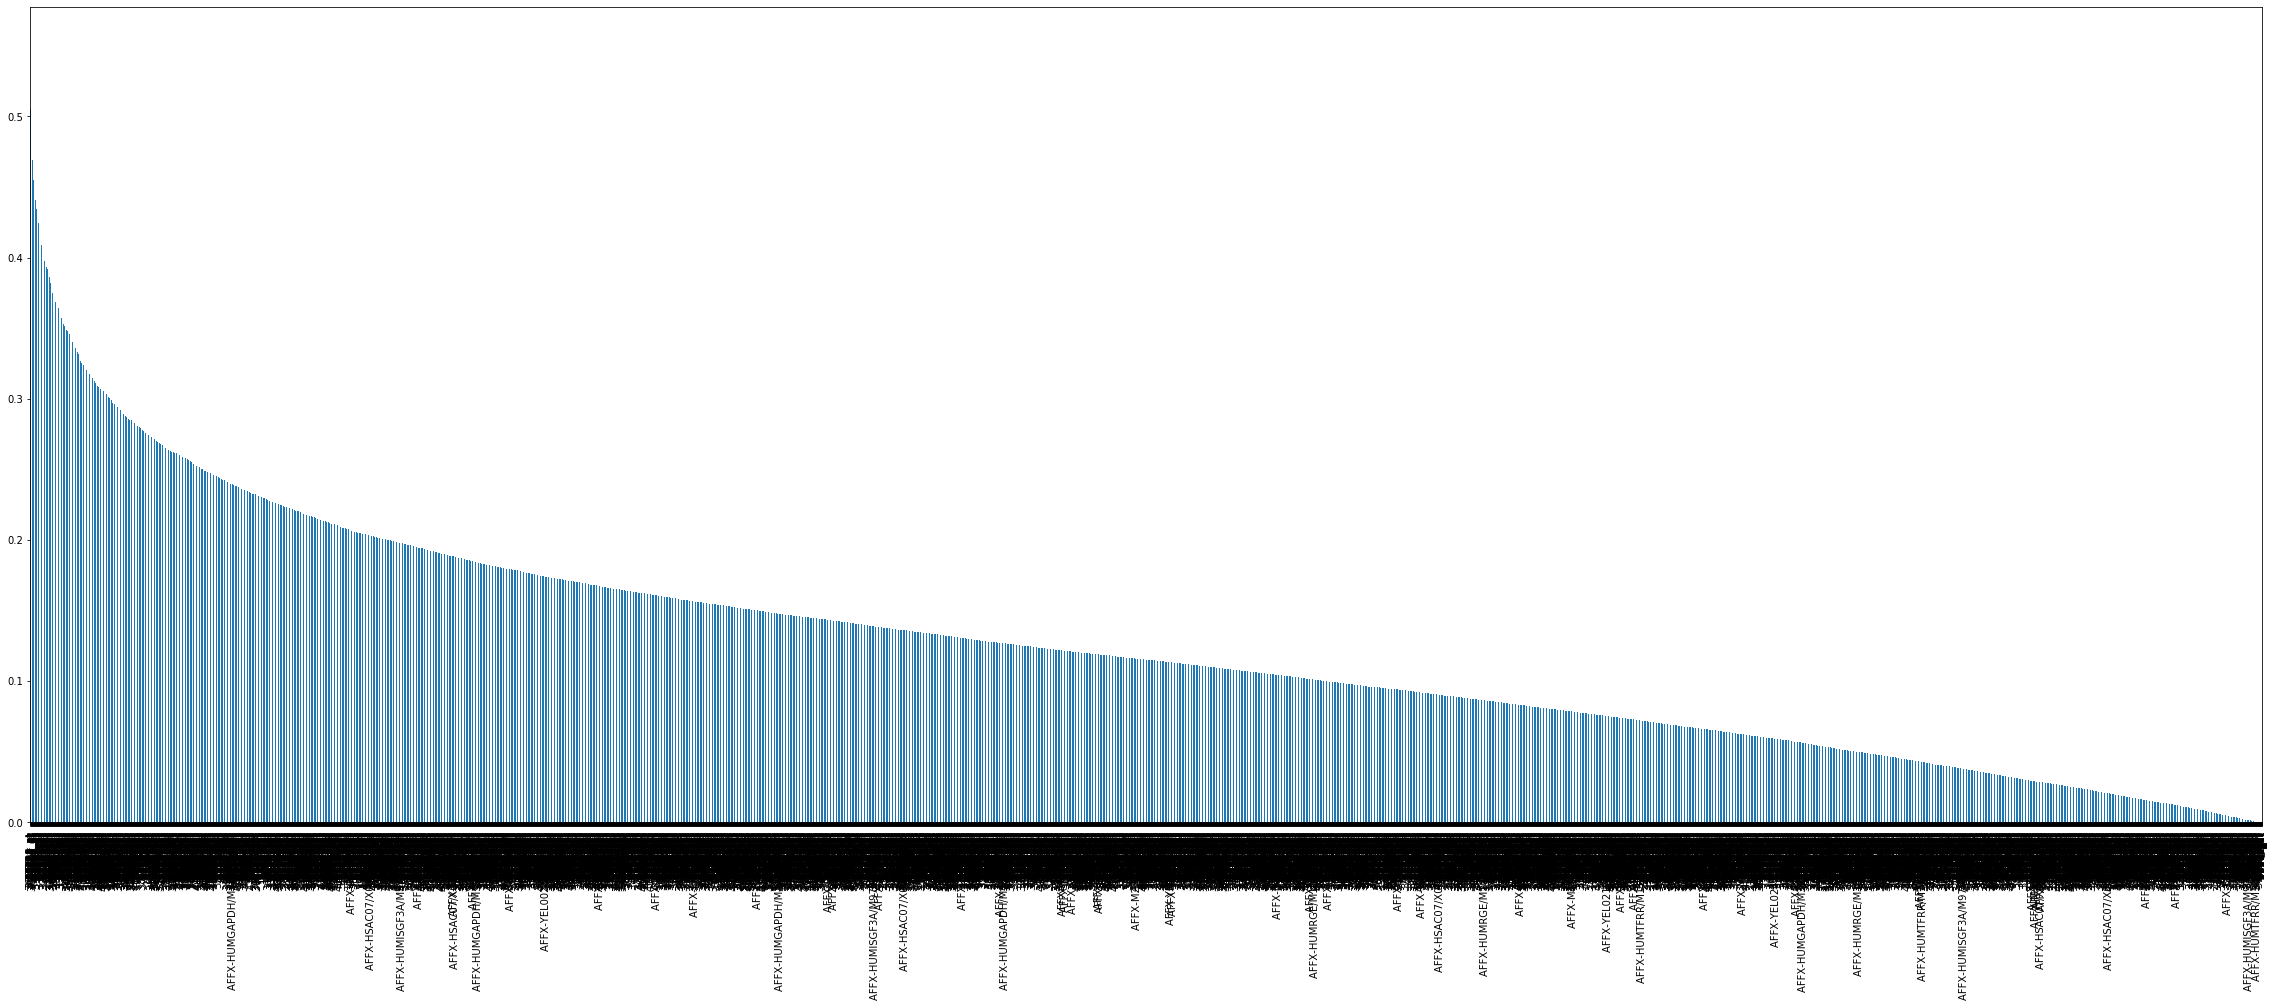

In [21]:
mutual_info=pd.Series(mutual_information)
mutual_info.index=feature_name
mutual_info.sort_values(ascending=False,inplace=True)
mutual_info.plot.bar(figsize=(40,15))

In [22]:
required_indices = (-mutual_information).argsort()[:number_of_features_required_1]
selected_features_mi=[]
selected_indices=[]
for i in range(number_of_features_required_1):
    required_indices[i] = required_indices[i] + 1
    selected_indices.append(required_indices[i])
    selected_features_mi.append(feature_name[required_indices[i]])
    print('Selected Feature '+str(i+1)+ ' is : ', feature_name[required_indices[i]])

Selected Feature 1 is :  32378_at 
Selected Feature 2 is :  41483_s_at 
Selected Feature 3 is :  32235_at 
Selected Feature 4 is :  36596_r_at 
Selected Feature 5 is :  35566_f_at 
Selected Feature 6 is :  32808_at 
Selected Feature 7 is :  41276_at 
Selected Feature 8 is :  39070_at 
Selected Feature 9 is :  34792_at 
Selected Feature 10 is :  1069_at 
Selected Feature 11 is :  36659_at 
Selected Feature 12 is :  256_s_at 
Selected Feature 13 is :  34409_at 
Selected Feature 14 is :  35109_at 
Selected Feature 15 is :  35916_s_at 
Selected Feature 16 is :  33614_at 
Selected Feature 17 is :  35414_s_at 
Selected Feature 18 is :  36702_at 
Selected Feature 19 is :  1369_s_at 
Selected Feature 20 is :  33703_f_at 
Selected Feature 21 is :  2079_s_at 
Selected Feature 22 is :  36658_at 
Selected Feature 23 is :  1394_at 
Selected Feature 24 is :  32145_at 
Selected Feature 25 is :  1664_at 
Selected Feature 26 is :  40103_at 
Selected Feature 27 is :  40695_at 
Selected Feature 28 is :  

Selected Feature 597 is :  39263_at 
Selected Feature 598 is :  39543_at 
Selected Feature 599 is :  37028_at 
Selected Feature 600 is :  37122_at 
Selected Feature 601 is :  31533_s_at 
Selected Feature 602 is :  38458_at 
Selected Feature 603 is :  39092_at 
Selected Feature 604 is :  31514_at 
Selected Feature 605 is :  31315_at 
Selected Feature 606 is :  40899_at 
Selected Feature 607 is :  1309_at 
Selected Feature 608 is :  36037_g_at 
Selected Feature 609 is :  35749_at 
Selected Feature 610 is :  36253_at 
Selected Feature 611 is :  39864_at 
Selected Feature 612 is :  31391_at 
Selected Feature 613 is :  38483_at 
Selected Feature 614 is :  2010_at 
Selected Feature 615 is :  31814_i_at 
Selected Feature 616 is :  35351_at 
Selected Feature 617 is :  39030_at 
Selected Feature 618 is :  36641_at 
Selected Feature 619 is :  38284_at 
Selected Feature 620 is :  36075_at 
Selected Feature 621 is :  37599_at 
Selected Feature 622 is :  361_at 
Selected Feature 623 is :  39514_s_a

Selected Feature 1096 is :  40994_at 
Selected Feature 1097 is :  39490_f_at 
Selected Feature 1098 is :  40116_at 
Selected Feature 1099 is :  1486_at 
Selected Feature 1100 is :  31532_at 
Selected Feature 1101 is :  33393_at 
Selected Feature 1102 is :  36000_at 
Selected Feature 1103 is :  506_s_at 
Selected Feature 1104 is :  41077_at 
Selected Feature 1105 is :  41583_at 
Selected Feature 1106 is :  41746_at 
Selected Feature 1107 is :  39667_at 
Selected Feature 1108 is :  2058_s_at 
Selected Feature 1109 is :  37381_g_at 
Selected Feature 1110 is :  40931_at 
Selected Feature 1111 is :  36597_at 
Selected Feature 1112 is :  583_s_at 
Selected Feature 1113 is :  35776_at 
Selected Feature 1114 is :  37976_at 
Selected Feature 1115 is :  800_g_at 
Selected Feature 1116 is :  40253_at 
Selected Feature 1117 is :  39291_at 
Selected Feature 1118 is :  1750_at 
Selected Feature 1119 is :  37248_at 
Selected Feature 1120 is :  2050_s_at 
Selected Feature 1121 is :  38779_r_at 
Select

Selected Feature 1554 is :  40672_at 
Selected Feature 1555 is :  31382_f_at 
Selected Feature 1556 is :  734_at 
Selected Feature 1557 is :  35297_at 
Selected Feature 1558 is :  41797_at 
Selected Feature 1559 is :  37347_at 
Selected Feature 1560 is :  40803_at 
Selected Feature 1561 is :  37068_at 
Selected Feature 1562 is :  671_at 
Selected Feature 1563 is :  31385_at 
Selected Feature 1564 is :  33789_at 
Selected Feature 1565 is :  39331_at 
Selected Feature 1566 is :  887_at 
Selected Feature 1567 is :  1959_at 
Selected Feature 1568 is :  34108_g_at 
Selected Feature 1569 is :  40871_at 
Selected Feature 1570 is :  36422_s_at 
Selected Feature 1571 is :  31548_at 
Selected Feature 1572 is :  38697_at 
Selected Feature 1573 is :  36933_at 
Selected Feature 1574 is :  41769_at 
Selected Feature 1575 is :  38424_at 
Selected Feature 1576 is :  38552_f_at 
Selected Feature 1577 is :  35866_at 
Selected Feature 1578 is :  32143_at 
Selected Feature 1579 is :  41008_at 
Selected Fe

Selected Feature 2022 is :  35541_r_at 
Selected Feature 2023 is :  1255_g_at 
Selected Feature 2024 is :  37240_at 
Selected Feature 2025 is :  39738_at 
Selected Feature 2026 is :  1257_s_at 
Selected Feature 2027 is :  40520_g_at 
Selected Feature 2028 is :  35842_at 
Selected Feature 2029 is :  38056_at 
Selected Feature 2030 is :  31944_at 
Selected Feature 2031 is :  32042_at 
Selected Feature 2032 is :  33059_at 
Selected Feature 2033 is :  41299_f_at 
Selected Feature 2034 is :  41197_at 
Selected Feature 2035 is :  33503_at 
Selected Feature 2036 is :  38135_at 
Selected Feature 2037 is :  36543_at 
Selected Feature 2038 is :  33329_at 
Selected Feature 2039 is :  325_s_at 
Selected Feature 2040 is :  1636_g_at 
Selected Feature 2041 is :  1747_at 
Selected Feature 2042 is :  35726_at 
Selected Feature 2043 is :  32596_at 
Selected Feature 2044 is :  35942_at 
Selected Feature 2045 is :  33521_at 
Selected Feature 2046 is :  40514_at 
Selected Feature 2047 is :  35128_at 
Sele

Selected Feature 2508 is :  41236_at 
Selected Feature 2509 is :  34196_at 
Selected Feature 2510 is :  39381_at 
Selected Feature 2511 is :  39119_s_at 
Selected Feature 2512 is :  32108_at 
Selected Feature 2513 is :  38861_at 
Selected Feature 2514 is :  37696_at 
Selected Feature 2515 is :  34656_at 
Selected Feature 2516 is :  1872_at 
Selected Feature 2517 is :  34231_at 
Selected Feature 2518 is :  38444_at 
Selected Feature 2519 is :  36984_f_at 
Selected Feature 2520 is :  38028_at 
Selected Feature 2521 is :  36165_at 
Selected Feature 2522 is :  41693_r_at 
Selected Feature 2523 is :  37350_at 
Selected Feature 2524 is :  254_at 
Selected Feature 2525 is :  32648_at 
Selected Feature 2526 is :  36770_at 
Selected Feature 2527 is :  41847_at 
Selected Feature 2528 is :  40938_at 
Selected Feature 2529 is :  1810_s_at 
Selected Feature 2530 is :  31936_s_at 
Selected Feature 2531 is :  39656_at 
Selected Feature 2532 is :  38610_s_at 
Selected Feature 2533 is :  33748_at 
Sele

Selected Feature 3106 is :  38387_at 
Selected Feature 3107 is :  38115_at 
Selected Feature 3108 is :  AFFX-ThrX-3_at 
Selected Feature 3109 is :  702_f_at 
Selected Feature 3110 is :  31737_at 
Selected Feature 3111 is :  1323_at 
Selected Feature 3112 is :  41053_at 
Selected Feature 3113 is :  31444_s_at 
Selected Feature 3114 is :  36601_at 
Selected Feature 3115 is :  32788_at 
Selected Feature 3116 is :  33079_at 
Selected Feature 3117 is :  494_at 
Selected Feature 3118 is :  1514_g_at 
Selected Feature 3119 is :  1581_s_at 
Selected Feature 3120 is :  37109_at 
Selected Feature 3121 is :  33417_at 
Selected Feature 3122 is :  36048_at 
Selected Feature 3123 is :  35206_at 
Selected Feature 3124 is :  39416_at 
Selected Feature 3125 is :  947_at 
Selected Feature 3126 is :  39820_at 
Selected Feature 3127 is :  32496_at 
Selected Feature 3128 is :  36677_at 
Selected Feature 3129 is :  36948_at 
Selected Feature 3130 is :  40784_at 
Selected Feature 3131 is :  41124_r_at 
Selec

Selected Feature 3569 is :  41382_at 
Selected Feature 3570 is :  1053_at 
Selected Feature 3571 is :  31336_at 
Selected Feature 3572 is :  39946_at 
Selected Feature 3573 is :  35483_at 
Selected Feature 3574 is :  37333_at 
Selected Feature 3575 is :  33378_at 
Selected Feature 3576 is :  39231_at 
Selected Feature 3577 is :  41873_at 
Selected Feature 3578 is :  AFFX-MurIL2_at 
Selected Feature 3579 is :  32237_at 
Selected Feature 3580 is :  39815_at 
Selected Feature 3581 is :  37251_s_at 
Selected Feature 3582 is :  32709_at 
Selected Feature 3583 is :  1985_s_at 
Selected Feature 3584 is :  31421_at 
Selected Feature 3585 is :  38185_at 
Selected Feature 3586 is :  33282_at 
Selected Feature 3587 is :  33290_at 
Selected Feature 3588 is :  1075_f_at 
Selected Feature 3589 is :  36324_at 
Selected Feature 3590 is :  39405_at 
Selected Feature 3591 is :  40120_at 
Selected Feature 3592 is :  38290_at 
Selected Feature 3593 is :  39638_at 
Selected Feature 3594 is :  39961_at 
Sel

Selected Feature 4089 is :  38182_at 
Selected Feature 4090 is :  35780_at 
Selected Feature 4091 is :  34013_f_at 
Selected Feature 4092 is :  32233_at 
Selected Feature 4093 is :  31399_at 
Selected Feature 4094 is :  41806_at 
Selected Feature 4095 is :  39548_at 
Selected Feature 4096 is :  41216_r_at 
Selected Feature 4097 is :  32431_at 
Selected Feature 4098 is :  1046_at 
Selected Feature 4099 is :  41034_s_at 
Selected Feature 4100 is :  34146_at 
Selected Feature 4101 is :  41178_at 
Selected Feature 4102 is :  40235_at 
Selected Feature 4103 is :  32831_at 
Selected Feature 4104 is :  2089_s_at 
Selected Feature 4105 is :  40513_at 
Selected Feature 4106 is :  301_at 
Selected Feature 4107 is :  38080_at 
Selected Feature 4108 is :  41422_at 
Selected Feature 4109 is :  39337_at 
Selected Feature 4110 is :  37063_r_at 
Selected Feature 4111 is :  764_s_at 
Selected Feature 4112 is :  39396_at 
Selected Feature 4113 is :  1472_g_at 
Selected Feature 4114 is :  2021_s_at 
Sele

Selected Feature 4602 is :  36598_s_at 
Selected Feature 4603 is :  39198_s_at 
Selected Feature 4604 is :  38752_r_at 
Selected Feature 4605 is :  34504_at 
Selected Feature 4606 is :  35136_at 
Selected Feature 4607 is :  799_at 
Selected Feature 4608 is :  35920_at 
Selected Feature 4609 is :  31451_at 
Selected Feature 4610 is :  35033_at 
Selected Feature 4611 is :  32291_at 
Selected Feature 4612 is :  38910_at 
Selected Feature 4613 is :  41107_at 
Selected Feature 4614 is :  33328_at 
Selected Feature 4615 is :  32434_at 
Selected Feature 4616 is :  38854_at 
Selected Feature 4617 is :  1339_s_at 
Selected Feature 4618 is :  34220_at 
Selected Feature 4619 is :  32525_r_at 
Selected Feature 4620 is :  35396_at 
Selected Feature 4621 is :  40806_at 
Selected Feature 4622 is :  41256_at 
Selected Feature 4623 is :  34446_at 
Selected Feature 4624 is :  37297_at 
Selected Feature 4625 is :  35823_at 
Selected Feature 4626 is :  37624_at 
Selected Feature 4627 is :  36719_r_at 
Sel

Selected Feature 5083 is :  40657_r_at 
Selected Feature 5084 is :  40572_at 
Selected Feature 5085 is :  38661_at 
Selected Feature 5086 is :  35234_at 
Selected Feature 5087 is :  39784_at 
Selected Feature 5088 is :  38796_at 
Selected Feature 5089 is :  36363_at 
Selected Feature 5090 is :  41300_s_at 
Selected Feature 5091 is :  39221_at 
Selected Feature 5092 is :  37657_at 
Selected Feature 5093 is :  36390_at 
Selected Feature 5094 is :  39563_at 
Selected Feature 5095 is :  39156_at 
Selected Feature 5096 is :  41207_at 
Selected Feature 5097 is :  1373_at 
Selected Feature 5098 is :  663_at 
Selected Feature 5099 is :  36240_at 
Selected Feature 5100 is :  35272_at 
Selected Feature 5101 is :  31463_s_at 
Selected Feature 5102 is :  1518_at 
Selected Feature 5103 is :  37583_at 
Selected Feature 5104 is :  32600_at 
Selected Feature 5105 is :  1751_g_at 
Selected Feature 5106 is :  36248_at 
Selected Feature 5107 is :  37581_at 
Selected Feature 5108 is :  38502_at 
Selected 

Selected Feature 5609 is :  31696_at 
Selected Feature 5610 is :  1773_at 
Selected Feature 5611 is :  39270_at 
Selected Feature 5612 is :  32766_at 
Selected Feature 5613 is :  1930_at 
Selected Feature 5614 is :  AFFX-BioC-5_at 
Selected Feature 5615 is :  38899_s_at 
Selected Feature 5616 is :  40998_at 
Selected Feature 5617 is :  1146_at 
Selected Feature 5618 is :  36966_at 
Selected Feature 5619 is :  36238_at 
Selected Feature 5620 is :  35526_at 
Selected Feature 5621 is :  919_at 
Selected Feature 5622 is :  31584_at 
Selected Feature 5623 is :  32557_at 
Selected Feature 5624 is :  32082_at 
Selected Feature 5625 is :  38025_r_at 
Selected Feature 5626 is :  40304_at 
Selected Feature 5627 is :  35083_at 
Selected Feature 5628 is :  35259_s_at 
Selected Feature 5629 is :  38007_at 
Selected Feature 5630 is :  36281_at 
Selected Feature 5631 is :  35654_at 
Selected Feature 5632 is :  38912_at 
Selected Feature 5633 is :  37600_at 
Selected Feature 5634 is :  1239_s_at 
Sele

Selected Feature 6046 is :  38581_at 
Selected Feature 6047 is :  36427_at 
Selected Feature 6048 is :  1375_s_at 
Selected Feature 6049 is :  38285_at 
Selected Feature 6050 is :  40693_at 
Selected Feature 6051 is :  1015_s_at 
Selected Feature 6052 is :  34181_at 
Selected Feature 6053 is :  39267_at 
Selected Feature 6054 is :  36951_at 
Selected Feature 6055 is :  35352_at 
Selected Feature 6056 is :  38895_i_at 
Selected Feature 6057 is :  32830_g_at 
Selected Feature 6058 is :  36743_at 
Selected Feature 6059 is :  36655_at 
Selected Feature 6060 is :  36104_at 
Selected Feature 6061 is :  37637_at 
Selected Feature 6062 is :  233_s_at 
Selected Feature 6063 is :  40257_at 
Selected Feature 6064 is :  38818_at 
Selected Feature 6065 is :  41344_s_at 
Selected Feature 6066 is :  40579_at 
Selected Feature 6067 is :  36262_at 
Selected Feature 6068 is :  35565_at 
Selected Feature 6069 is :  31788_at 
Selected Feature 6070 is :  33738_r_at 
Selected Feature 6071 is :  38210_at 
Se

Selected Feature 6506 is :  31631_f_at 
Selected Feature 6507 is :  37474_at 
Selected Feature 6508 is :  1448_at 
Selected Feature 6509 is :  37835_at 
Selected Feature 6510 is :  35904_at 
Selected Feature 6511 is :  31868_at 
Selected Feature 6512 is :  40665_at 
Selected Feature 6513 is :  32121_at 
Selected Feature 6514 is :  36805_s_at 
Selected Feature 6515 is :  34213_at 
Selected Feature 6516 is :  1968_g_at 
Selected Feature 6517 is :  472_at 
Selected Feature 6518 is :  38651_at 
Selected Feature 6519 is :  39583_at 
Selected Feature 6520 is :  37802_r_at 
Selected Feature 6521 is :  32879_at 
Selected Feature 6522 is :  41848_f_at 
Selected Feature 6523 is :  34415_at 
Selected Feature 6524 is :  31519_f_at 
Selected Feature 6525 is :  32368_at 
Selected Feature 6526 is :  37428_at 
Selected Feature 6527 is :  36318_at 
Selected Feature 6528 is :  35195_at 
Selected Feature 6529 is :  41328_s_at 
Selected Feature 6530 is :  41520_at 
Selected Feature 6531 is :  603_at 
Sele

Selected Feature 6989 is :  41149_at 
Selected Feature 6990 is :  1195_s_at 
Selected Feature 6991 is :  40187_at 
Selected Feature 6992 is :  37270_at 
Selected Feature 6993 is :  307_at 
Selected Feature 6994 is :  32777_at 
Selected Feature 6995 is :  33861_at 
Selected Feature 6996 is :  34821_at 
Selected Feature 6997 is :  40135_at 
Selected Feature 6998 is :  41546_at 
Selected Feature 6999 is :  1200_at 
Selected Feature 7000 is :  32871_at 
Selected Feature 7001 is :  38490_r_at 
Selected Feature 7002 is :  1221_at 
Selected Feature 7003 is :  620_at 
Selected Feature 7004 is :  33705_at 
Selected Feature 7005 is :  36838_at 
Selected Feature 7006 is :  117_at 
Selected Feature 7007 is :  36599_at 
Selected Feature 7008 is :  34086_at 
Selected Feature 7009 is :  37483_at 
Selected Feature 7010 is :  33402_at 
Selected Feature 7011 is :  1088_at 
Selected Feature 7012 is :  38804_at 
Selected Feature 7013 is :  34251_at 
Selected Feature 7014 is :  38768_at 
Selected Feature 7

Selected Feature 7496 is :  32110_at 
Selected Feature 7497 is :  37444_at 
Selected Feature 7498 is :  41593_at 
Selected Feature 7499 is :  34136_s_at 
Selected Feature 7500 is :  32602_at 
Selected Feature 7501 is :  2003_s_at 
Selected Feature 7502 is :  36232_at 
Selected Feature 7503 is :  32409_at 
Selected Feature 7504 is :  38440_s_at 
Selected Feature 7505 is :  38421_at 
Selected Feature 7506 is :  40608_at 
Selected Feature 7507 is :  AFFX-DapX-M_at 
Selected Feature 7508 is :  35204_at 
Selected Feature 7509 is :  32891_at 
Selected Feature 7510 is :  34736_at 
Selected Feature 7511 is :  1880_at 
Selected Feature 7512 is :  39888_at 
Selected Feature 7513 is :  41219_at 
Selected Feature 7514 is :  34790_at 
Selected Feature 7515 is :  37596_at 
Selected Feature 7516 is :  36243_at 
Selected Feature 7517 is :  39072_at 
Selected Feature 7518 is :  39835_at 
Selected Feature 7519 is :  34176_at 
Selected Feature 7520 is :  31890_s_at 
Selected Feature 7521 is :  1426_at 
S

Selected Feature 7967 is :  39447_f_at 
Selected Feature 7968 is :  34698_at 
Selected Feature 7969 is :  31491_s_at 
Selected Feature 7970 is :  38790_at 
Selected Feature 7971 is :  41507_at 
Selected Feature 7972 is :  32417_at 
Selected Feature 7973 is :  2026_at 
Selected Feature 7974 is :  40956_at 
Selected Feature 7975 is :  35963_at 
Selected Feature 7976 is :  40137_at 
Selected Feature 7977 is :  37752_at 
Selected Feature 7978 is :  39774_at 
Selected Feature 7979 is :  36707_s_at 
Selected Feature 7980 is :  2063_at 
Selected Feature 7981 is :  31713_s_at 
Selected Feature 7982 is :  41005_at 
Selected Feature 7983 is :  35157_at 
Selected Feature 7984 is :  33808_at 
Selected Feature 7985 is :  35943_s_at 
Selected Feature 7986 is :  38864_at 
Selected Feature 7987 is :  32228_at 
Selected Feature 7988 is :  32306_g_at 
Selected Feature 7989 is :  33744_at 
Selected Feature 7990 is :  417_at 
Selected Feature 7991 is :  31667_r_at 
Selected Feature 7992 is :  34913_at 
Se

In [23]:
required_features_mi = selected_features_mi
print('Length of required features : '+str(len(required_features_mi)))
print(required_features_mi)

Length of required features : 8400
['32378_at ', '41483_s_at ', '32235_at ', '36596_r_at ', '35566_f_at ', '32808_at ', '41276_at ', '39070_at ', '34792_at ', '1069_at ', '36659_at ', '256_s_at ', '34409_at ', '35109_at ', '35916_s_at ', '33614_at ', '35414_s_at ', '36702_at ', '1369_s_at ', '33703_f_at ', '2079_s_at ', '36658_at ', '1394_at ', '32145_at ', '1664_at ', '40103_at ', '40695_at ', '41771_g_at ', '33131_at ', '41435_at ', '38675_at ', '38479_at ', '37020_at ', '36894_at ', '823_at ', 'AFFX-hum_alu_at ', '39370_at ', '36024_at ', '38051_at ', '36184_at ', '1235_at ', '37655_at ', '1367_f_at ', '40718_at ', '632_at ', '38229_at ', '35336_at ', '37923_at ', '319_g_at ', '40867_at ', '36616_at ', '37745_s_at ', '33308_at ', '34811_at ', '33754_at ', '32662_at ', '291_s_at ', '33545_at ', '38487_at ', '33383_f_at ', '41220_at ', '32590_at ', '38971_r_at ', '39350_at ', '31773_at ', '297_g_at ', '35412_at ', '36994_at ', '39389_at ', '36851_g_at ', '38729_at ', '33699_at ', '416

In [24]:
X_train1 = X_train[required_features_mi]
X_train1.head()

,32378_at,41483_s_at,32235_at,36596_r_at,35566_f_at,32808_at,41276_at,39070_at,34792_at,1069_at,...,39870_at,1584_at,32945_i_at,33951_at,31804_f_at,41439_at,1079_g_at,39794_at,36476_at,38982_at
116,-0.890271,3.013027,0.046863,-0.632370,-0.572445,-0.528458,-0.685495,-0.323686,-1.065416,-0.074668,...,-1.081577,-1.654207,-1.706843,-1.800238,-0.458373,0.515256,-1.383831,-1.731708,-1.348825,-0.293619
55,0.050728,-0.423036,-0.546439,-0.270487,1.241250,0.626927,-1.078721,-0.275933,-0.271079,-0.246380,...,0.303542,-1.178651,-1.128465,-0.555994,-0.683071,0.881541,-0.803478,-1.063354,-1.344073,-0.198171
26,-1.153657,-0.298102,-0.852081,-0.211201,-0.105905,0.050207,-0.318702,0.921209,1.400690,0.103045,...,-1.489227,0.591521,0.828931,0.934393,-0.592131,-0.228590,1.161021,0.752888,-0.337254,-0.289387
130,-0.349643,0.245575,-0.583619,-0.055180,2.347136,0.177503,-0.213364,-0.557911,0.054288,-0.130522,...,0.519308,-0.346213,-0.308508,-0.775790,-1.050224,0.240186,1.224151,-0.129126,0.098789,0.093755
177,0.562408,-0.520316,-1.116548,0.587795,-0.630254,0.316407,-0.670912,1.919828,0.486168,-0.513426,...,2.356229,-0.565866,-0.678495,-1.784098,-0.362961,0.072585,-0.291476,-0.325003,-0.679672,0.386518


# Selection of features using F Classification 

In [25]:
f_start_time = time.time()
def correlation(df, threshold):
    correlation_set = set()  
    correlation_matrix = df.corr()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold: #Here, we are interested in absolute coeff value
                column_name = correlation_matrix.columns[i]  # It is storing the name of column
                correlation_set.add(column_name)
    return correlation_set


selected_features_fc = correlation(X_train1, 0.5)
print('Time taken by F-Classification is :'+str(time.time() - f_start_time)+' seconds')

Time taken by F-Classification is :704.3059203624725 seconds


In [26]:
print('Length of selected features : '+str(len(selected_features_fc)))

Length of selected features : 7591


In [27]:
selected_features_fc = list(selected_features_fc)
print('Selected features using F classification')
print(selected_features_fc)

Selected features using F classification
['36273_at ', '1471_at ', '1358_s_at ', '33561_at ', '39076_s_at ', '34701_at ', '1984_s_at ', '41494_at ', '41017_at ', '38937_at ', '1837_at ', '41267_at ', '33439_at ', '34874_at ', '32617_at ', '41462_at ', '39674_r_at ', '36681_at ', '40975_s_at ', '41087_at ', '40204_at ', '36026_at ', '285_g_at ', '37293_at ', '31601_s_at ', '37015_at ', '687_at ', '37292_at ', '1759_f_at ', '35586_at ', '37768_at ', '40299_at ', '33101_g_at ', '663_at ', '162_at ', '32403_at ', '32665_at ', '1888_s_at ', '39067_at ', '34740_at ', '35507_at ', '458_at ', '40726_at ', '40889_at ', '41209_at ', '39525_at ', '41420_at ', '36775_f_at ', '37307_at ', '37063_r_at ', '40827_at ', '40565_at ', '33940_at ', '40312_at ', '37346_at ', '31784_at ', '39434_at ', '33658_at ', '33971_f_at ', '34096_at ', '31514_at ', '38722_at ', '33008_at ', '37243_at ', '1433_g_at ', '31915_at ', '38437_at ', '38395_at ', '34599_at ', '1314_at ', '808_at ', '34181_at ', '35889_at ', '

In [28]:
required_features_fc = selected_features_fc[:number_of_features_required_2]
print('Length of required features : '+str(len(required_features_fc)))

Length of required features : 4200


In [29]:
X_train2 = X_train[required_features_fc]
X_train2.head()

,36273_at,1471_at,1358_s_at,33561_at,39076_s_at,34701_at,1984_s_at,41494_at,41017_at,38937_at,...,36588_at,31720_s_at,31318_at,41541_at,1684_s_at,35234_at,828_at,33173_g_at,37993_at,35573_r_at
116,-1.597925,-1.454537,-1.012038,-0.615879,-0.925273,-0.435727,0.384584,-0.577767,-0.532043,-0.596929,...,-0.765613,-0.001319,-1.514255,-1.827229,-1.100562,-0.552179,-1.322875,-1.724690,-1.023904,-1.678850
55,-1.008765,-0.709065,-0.555149,-0.555175,-0.595657,0.244275,1.440838,0.190003,-0.769123,-0.993944,...,-0.158231,0.384516,-1.084218,-0.616632,-0.923503,-1.325768,-0.625770,-1.037140,0.274818,-0.889803
26,0.856364,0.532884,-0.452406,0.397699,-0.045841,0.436972,-0.241180,1.272027,0.597725,-0.437570,...,-0.218918,-0.796253,0.550368,0.445363,0.313906,0.223136,1.960898,0.671613,0.131760,0.619981
130,0.333212,-0.026314,-0.518736,-0.709695,-0.541631,0.685637,-0.015048,1.184988,-0.090406,-1.408019,...,0.906862,0.237417,-0.245395,1.204533,-0.860969,-0.246543,-0.012623,1.356082,2.159552,-0.042205
177,0.226290,-0.283621,-0.773203,-0.745565,-0.364465,0.608514,-1.085608,0.143735,0.483036,-0.804889,...,0.292951,0.585287,-0.830894,1.110383,-0.927139,-0.647151,-0.570816,1.436634,-0.895483,-0.537102


# Feature Selection Using T-Test

In [31]:
import statistics
temp_index = ['class'] + required_features_fc
new_df = df[temp_index]
new_df.shape
start_time_t = time.time()
x= new_df.values.copy()              # It is converting df into numpy arrray


a,b = x.shape     # Here, a is taking row and b is taking columns        
n1 =0
n2 = 0
n3=0
n4 = 0
n5 = 0

for i in range(a):        
    if x[i][0] == 1:
        n1 = n1 + 1;
    elif x[i][0] ==2:
        n2 = n1 + 1;
    elif x[i][0] == 3:
        n3 = n1 + 1;
    elif x[i][0] ==4:
        n4 = n1 + 1;
    else:
        n5 = n1 + 1;

n = [n1,n2,n3,n4,n5]



tval=[]
sample1=[]
sample2=[]
sample3=[]
sample4=[]
sample5=[]

# It is calculating t value
for j in range(1,b):      
    for i in range(a):

        if x[i][0]== 1:          
            sample1.append(x[i][j])
        elif x[i][0]== 2:
            sample2.append(x[i][j])
        elif x[i][0]== 3:
            sample3.append(x[i][j])
        elif x[i][0]== 4:
            sample4.append(x[i][j])
        else :
            sample5.append(x[i][j])

# It is converting sample values from string to float
    sample1 = list(map(float,sample1))       
    sample2 = list(map(float,sample2))
    sample3 = list(map(float, sample3))
    sample4 = list(map(float, sample4))
    sample5 = list(map(float, sample5))

    sample = [sample1,sample2,sample3,sample4,sample5]



    sbar = [0,0,0,0,0]
    svar = [0,0,0,0,0]
    tset = []
    for p in range(5):
         sbar[p] =  statistics.mean(sample[p])         
            
    for q in range(5):
        svar[q] = statistics.variance(sample[q])     




    for m in range(4):

        for k in range(m+1,5):
          t = abs(sbar[m] - sbar[k])/np.sqrt(svar[m]/n[m]+svar[m]/n[k])  # It is calculating t value by comparing mean and variance using given formula
          tset.append(t)

    tavg = statistics.mean(tset)
    tval.append(tavg)       
    
    sample1.clear()    
    sample2.clear()
    sample3.clear()
    sample4.clear()
    sample5.clear()
    tset.clear()



sort_index=[]

sort_index = sorted(range(len(tval)), key=lambda k: tval[k])   

new_index = [p+1 for p in sort_index]   
new_index.reverse()  

required_features_t = new_index[:number_of_features_required_3]   #It is selecting important features
print('Time taken by T Test is :'+str(time.time() - start_time_t)+' seconds')

Time taken by T Test is :19.008090019226074 seconds


In [32]:
print(required_features_t)

[3018, 1464, 2057, 271, 1470, 2608, 184, 313, 2748, 1735, 3145, 327, 45, 3915, 585, 2709, 3834, 1956, 3710, 875, 3007, 1015, 2683, 1951, 3051, 937, 2255, 1665, 3941, 3034, 3862, 2009, 2201, 177, 439, 2266, 2011, 535, 410, 26, 1828, 3761, 2799, 1991, 983, 2379, 1669, 3225, 4035, 2071, 3412, 3615, 755, 860, 1025, 2695, 2544, 1538, 136, 1631, 1646, 4019, 122, 956, 1858, 70, 621, 2184, 2362, 951, 1789, 1392, 649, 4120, 3523, 3078, 3401, 3614, 728, 1730, 4125, 4015, 2437, 1531, 1613, 759, 882, 79, 3408, 637, 657, 161, 3048, 3571, 386, 497, 128, 193, 2190, 3474, 1934, 1083, 811, 4135, 1697, 2705, 456, 1809, 711, 1216, 1824, 2487, 3875, 1385, 2639, 2070, 2551, 980, 3780, 389, 3012, 3384, 35, 302, 3258, 1802, 1640, 2160, 2964, 786, 3347, 2400, 1999, 1218, 2436, 3186, 3549, 2389, 459, 3492, 3616, 574, 1933, 501, 3344, 1103, 2850, 4169, 24, 2852, 1794, 2233, 1253, 4013, 2298, 1318, 2877, 2842, 309, 2472, 1020, 180, 2892, 408, 2869, 1305, 1595, 985, 1873, 3830, 1420, 4093, 2107, 3656, 458, 2798, 

In [33]:
df1 = df.iloc[:,required_features_t]
selected_features_tt=list(df1)
print('Length of selected_features_tt : ',len(selected_features_tt))

Length of selected_features_tt :  2394


In [34]:
print('selected_features_tt :',selected_features_tt)

selected_features_tt : ['35576_f_at ', '38982_at ', '36210_g_at ', '577_at ', '39708_at ', '33348_at ', '33703_f_at ', '37019_at ', '41407_at ', '241_g_at ', '33891_at ', '35278_at ', '38784_g_at ', '34246_at ', '556_s_at ', '41243_at ', '37218_at ', '36493_at ', '1218_at ', '33451_s_at ', '39372_at ', '39800_s_at ', '39078_at ', '37730_at ', '35756_at ', '40888_f_at ', '1347_at ', '41292_at ', '40528_at ', '34042_at ', '891_at ', '39242_at ', '40210_at ', '36931_at ', '254_at ', '31953_f_at ', '40297_at ', '41294_at ', '31460_f_at ', '33377_at ', '39688_at ', '40026_g_at ', '35377_at ', '35338_at ', '38527_at ', '35454_at ', '38738_at ', '31403_at ', '34086_at ', '33113_at ', '40405_at ', '37442_at ', '41792_at ', '32543_at ', '38636_at ', '32988_at ', '31830_s_at ', '35941_f_at ', '35926_s_at ', '41222_at ', '40167_s_at ', '41107_at ', '1390_s_at ', '32426_f_at ', '39879_s_at ', '34091_s_at ', '37310_at ', '39113_at ', '33319_at ', '36198_at ', '1228_s_at ', '1563_s_at ', '33991_g_at

In [35]:
X_train3 = X_train.iloc[:,required_features_t]

In [36]:
X_train3.head()

,41870_at,38614_s_at,38832_r_at,2062_at,408_at,37722_s_at,37015_at,41337_at,40182_s_at,41856_at,...,1358_s_at,734_at,38462_at,32408_s_at,37168_at,40234_at,33613_at,37720_at,41161_at,34162_at
116,1.147690,-0.718453,0.709240,-0.196762,-0.466197,-0.461922,0.036821,0.652630,-0.296744,-0.246056,...,-1.012038,-0.398437,-0.526687,-0.808572,2.880511,-0.020985,-0.523912,-0.678729,-0.326896,0.117848
55,-1.112667,-0.515175,0.044791,-0.809861,1.108704,-0.855331,-0.292945,-0.251956,-1.091098,-0.811497,...,-0.555149,-0.672600,-0.444779,-0.746634,-0.232352,-0.398352,0.079816,-0.521506,0.345449,-0.871682
26,-0.035962,-0.029726,-0.786806,-0.101885,0.145829,-0.678351,-0.410524,-0.292215,-0.010042,-0.145057,...,-0.452406,1.312561,-0.569408,-0.334883,-0.325297,-0.919731,-0.420030,-0.385807,-0.106749,-0.299665
130,-1.785226,0.161644,-1.198903,0.279131,-0.171801,-0.864234,-0.085178,-0.294537,0.003687,0.413428,...,-0.518736,2.143855,0.475128,0.290788,0.679564,-0.495954,0.000227,-0.302576,-0.502611,-0.619400
177,3.508713,-0.042006,0.161242,0.463046,-0.333696,-0.064062,-0.346039,-0.700274,0.690939,1.705326,...,-0.773203,-0.203728,0.294681,0.991955,-0.081612,1.349796,-0.875244,0.365142,-0.052257,-0.429622


In [37]:
X_test3 = X_test.iloc[:,required_features_t]
X_test3.head()

,41870_at,38614_s_at,38832_r_at,2062_at,408_at,37722_s_at,37015_at,41337_at,40182_s_at,41856_at,...,1358_s_at,734_at,38462_at,32408_s_at,37168_at,40234_at,33613_at,37720_at,41161_at,34162_at
18,0.920189,-0.194581,-0.271937,-0.798135,-0.309762,-0.661466,-0.406919,-0.847024,-0.795965,-0.940159,...,-0.351073,0.737860,-0.448729,1.197665,-0.327843,-0.771697,-0.666490,0.648042,-0.426742,-0.829188
45,-0.464795,0.377761,0.616130,-0.911343,-0.484673,-0.239891,-0.407108,-0.754714,0.210746,0.649289,...,1.589279,-0.450938,-0.483134,-0.399577,-0.393335,-0.170160,0.329024,-0.270455,-0.444514,0.043999
33,-0.846435,0.208998,-1.010172,2.611108,0.710640,-0.503366,-0.259933,-0.155670,0.022314,0.867571,...,0.153264,-0.741636,-0.725844,-0.376322,-0.107550,-1.287860,0.251524,0.792647,-0.212044,-0.516879
37,-1.434030,0.106754,-1.215467,0.301050,-0.090621,-0.446112,-0.393710,-0.945684,0.883466,1.184533,...,1.643716,-0.077725,-0.321916,-0.296199,-0.533995,-0.843758,0.279226,0.164809,-0.889251,0.982371
109,2.043737,-0.481031,-0.120098,-1.133319,-0.368408,-0.227535,-0.434231,-0.703527,0.307330,-1.054584,...,-0.366153,0.002225,-0.116938,-0.740792,-0.639565,-0.787349,0.425431,0.031042,-1.054068,-0.688504


In [38]:
X_test3.shape

(41, 2394)

In [39]:
y_train3 = np.array([a+1 for a in y_train]) 
print(y_train3)

y_test3 = np.array([a+1 for a in y_test])

print(y_test3)

[1 1 1 1 4 1 1 1 4 1 4 5 2 1 5 1 1 1 1 1 1 1 1 1 2 1 1 4 1 5 5 1 1 1 2 1 1
 1 1 2 5 1 1 2 5 1 1 1 1 4 1 1 1 1 1 5 4 2 1 1 1 4 3 5 1 1 1 1 1 1 2 1 1 1
 1 1 5 1 2 1 5 1 1 1 1 1 1 1 4 5 1 1 1 1 3 4 3 1 5 1 1 1 1 1 1 1 1 4 1 1 1
 4 1 1 1 1 3 1 1 1 1 2 1 4 1 4 1 4 2 4 2 1 1 1 1 1 2 5 1 1 1 4 1 5 4 5 1 1
 2 1 1 1 1 1 1 1 5 1 5 1 1 4]
[1 1 1 1 1 1 1 1 1 2 1 5 4 3 2 1 1 1 1 1 1 2 1 1 1 2 5 4 3 1 5 1 1 1 1 1 1
 1 1 4 1]


# KNN Classifier

In [42]:
temp_fscore=0
temp_cm = np.zeros([5,5])
sum =0
for i in range(1,20):
    classfier = KNeighborsClassifier(n_neighbors=i)
    classfier.fit(X_train3, y_train3) 
    print('KNN Classfier for '+str(i)+ ' neighbors:')
    y_train_prediction = classfier.predict(X_train3)
    print('Training accuracy on selected features for '+str(i)+ ' neighbors: %.4f' % (100*acc(y_train3, y_train_prediction)))

    y_test_prediction = classfier.predict(X_test3)
    print('Testing accuracy on selected features for '+str(i)+ ' neighbors: %.4f' %(100*acc(y_test3, y_test_prediction)))
    
    f_score_knn = f1_score(y_test3, y_test_prediction,average='micro')
    temp_fscore= temp_fscore + f_score_knn
    
    cm = confusion_matrix(y_test3, y_test_prediction)
    cm= np.array(cm)
    temp_cm = temp_cm + cm
    
    sum = sum + 100*acc(y_test3, y_test_prediction)
    if i !=1:
        if max_test_accuracy < (100*acc(y_test3, y_test_prediction)):
            max_test_accuracy = (100*acc(y_test3, y_test_prediction))
            max_y_test_prediction = y_test_prediction
            index = i
    else:
        max_test_accuracy = (100*acc(y_test3, y_test_prediction))
        max_y_test_prediction = y_test_prediction
        index = i

print('Average Testing accuracy obtained on selected features by KNN Classifier: %.4f' % (sum/19))                        
print('Maximum Testing accuracy obtained on selected features for '+str(index)+ ' neighbors: %.4f' % max_test_accuracy)                   

KNN Classfier for 1 neighbors:
Training accuracy on selected features for 1 neighbors: 100.0000
Testing accuracy on selected features for 1 neighbors: 95.1220
KNN Classfier for 2 neighbors:
Training accuracy on selected features for 2 neighbors: 96.2963
Testing accuracy on selected features for 2 neighbors: 95.1220
KNN Classfier for 3 neighbors:
Training accuracy on selected features for 3 neighbors: 95.6790
Testing accuracy on selected features for 3 neighbors: 97.5610
KNN Classfier for 4 neighbors:
Training accuracy on selected features for 4 neighbors: 93.2099
Testing accuracy on selected features for 4 neighbors: 92.6829
KNN Classfier for 5 neighbors:
Training accuracy on selected features for 5 neighbors: 94.4444
Testing accuracy on selected features for 5 neighbors: 95.1220
KNN Classfier for 6 neighbors:
Training accuracy on selected features for 6 neighbors: 92.5926
Testing accuracy on selected features for 6 neighbors: 92.6829
KNN Classfier for 7 neighbors:
Training accuracy on

In [44]:
cm = confusion_matrix(y_test3, max_y_test_prediction)
print('Maximum Confusion matrix :',cm)
print('Average Confusion matrix is :',(temp_cm/19))

Maximum Confusion matrix : [[29  0  0  0  0]
 [ 0  4  0  0  0]
 [ 0  0  2  0  0]
 [ 1  0  0  2  0]
 [ 0  0  0  0  3]]
Average Confusion matrix is : [[29.          0.          0.          0.          0.        ]
 [ 0.63157895  3.36842105  0.          0.          0.        ]
 [ 1.47368421  0.          0.52631579  0.          0.        ]
 [ 1.47368421  0.          0.          1.52631579  0.        ]
 [ 0.          0.          0.          0.          3.        ]]


Confusion Matrix of KNN Classifier:


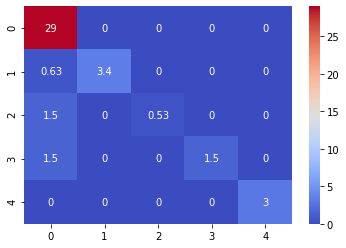

In [45]:
print('Confusion Matrix of KNN Classifier:')
sns.heatmap((temp_cm/19),annot = True,cmap='coolwarm')

In [46]:
f_score_knn = f1_score(y_test3, max_y_test_prediction,average='micro')

print('Maximum F-Score is : '+str(f_score_knn))
print('Average F-Score is : '+str(temp_fscore/19))

Maximum F-Score is : 0.975609756097561
Average F-Score is : 0.9127086007702185


# SVM(Support Vector Machine)

In [47]:
from sklearn.svm import SVC
classfier_svc = SVC()
classfier_svc.fit(X_train3,y_train3)
print('SVM Classfier')
y_train_prediction_svc = classfier_svc.predict(X_train3)
print('Training accuracy on selected features: %.4f' % (100*acc(y_train3, y_train_prediction_svc)))

y_test_prediction_svc = classfier_svc.predict(X_test3)
print('Testing accuracy on selected features: %.4f' % (100*acc(y_test3, y_test_prediction_svc)))

SVM Classfier
Training accuracy on selected features: 99.3827
Testing accuracy on selected features: 90.2439


In [48]:
cm_svc = confusion_matrix(y_test3, y_test_prediction_svc)
print('Confusion Matrix of SVM Classifier:')
print(cm_svc)

Confusion Matrix of SVM Classifier:
[[29  0  0  0  0]
 [ 1  3  0  0  0]
 [ 2  0  0  0  0]
 [ 1  0  0  2  0]
 [ 0  0  0  0  3]]


Confusion Matrix of SVM Classifier:


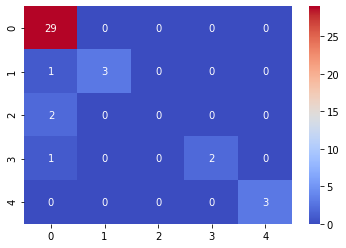

In [49]:
print('Confusion Matrix of SVM Classifier:')
sns.heatmap(cm_svc,annot = True,cmap='coolwarm', fmt = "d")

In [50]:
f_score_svc = f1_score(y_test3, y_test_prediction_svc,average='micro')

print(' F-Score of SVM Classifier is : '+str(f_score_svc))

 F-Score of SVM Classifier is : 0.9024390243902439
